#              Projet 2 : Analyse des données de systèmes éducatifs

## **Partie 1** :

## 1.1 Cahier de charges du projet
    
Une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et     université souhaite développer son activité à l’international 

**Misson** : Déterminer si le jeu de données EdStat permet d'identifier les pays avec un fort potentiel de clients pour nos  
             services et comment ce potentiel pourrait évoluer pour chacun de ces pays.

**Données** : Les données sont disponibles sur ce site de la Banque mondiale à l'adresse suivante : [Lien](https://datacatalog.worldbank.org/search/dataset/0038480)        
            
   
 **Objectif** :
    
* <font size="4">Validation de la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
    
* <font size="4">Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

* <font size="4">Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les        colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
    
* <font size="4"> Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)



## 1.2 Création d'un environnement virtuel

* <font size="4"> **Etape 1** : lancer cmd Anaconda Prompt

* <font size="4"> **Etape 2** : 
 (base) C:\Users\Formation Data Scientist 2023-2024 MERAH\2-Projet\2-Projet 2\4-Code>python -m venv venvP2

* <font size="4"> **Etape 3**: 
(base) C:\Users\Formation Data Scientist 2023-2024 MERAH\2-Projet\2-Projet 2\4-Code\venvP2\Scripts>activate.bat

* <font size="4"> **Etape 4**:
(venvP2) (base) C:\Users\Formation Data Scientist 2023-2024 MERAH\2-Projet\2-Projet 2\4-Code\venvP2\Scripts>pip install ipykernel

* <font size="4"> **Etape 5** : renommer : ipython kernel install --user --name=venvPr2kernel
(venvP2) (base) C:\Users\Desktop\Formation Data Scientist 2023-2024 MERAH\2-Projet\2-Projet 2\4-Code\venvP2\Scripts>ipython kernel install --user --name=venvPr2kernel


## 1.3 Les versions des bibliothèques utilisées  
* <font size="4">Version Python ------3.11.4 
* <font size="4">Version NumPy -------1.25.2
* <font size="4">Version Pandas ------2.1.0 
* <font size="4">Version Matplotlib --3.7.3  
* <font size="4">Version Seaborn  ----0.12.2 
* <font size="4">Version Sklearn -----0.0.post9 
* <font size="4">Version missingno----0.5.2

In [1]:
pip list

Package           Version
----------------- ------------
asttokens         2.4.0
backcall          0.2.0
colorama          0.4.6
colored           2.2.3
comm              0.1.4
contourpy         1.1.0
cycler            0.11.0
debugpy           1.8.0
decorator         5.1.1
executing         1.2.0
fonttools         4.42.1
ipykernel         6.25.2
ipython           8.15.0
jedi              0.19.0
joblib            1.3.2
jupyter_client    8.3.1
jupyter_core      5.3.1
kiwisolver        1.4.5
matplotlib        3.7.3
matplotlib-inline 0.1.6
missingno         0.5.2
nest-asyncio      1.5.7
nltk              3.2.4
numpy             1.25.2
packaging         23.1
pandas            2.1.0
parso             0.8.3
pd                0.0.4
pickleshare       0.7.5
Pillow            10.0.0
pip               23.2.1
platformdirs      3.10.0
preprocessing     0.1.13
prompt-toolkit    3.0.39
psutil            5.9.5
pure-eval         0.2.2
Pygments          2.16.1
pyparsing         3.1.1
python-dateutil   2.

## **Paritie 2** :

## 2.1 Importations des librairies

In [2]:
#------------------------------------------
# projet 2: Analyse des données de systèmes éducatifs
# Auteur : Mohamed MERAH
# Date: Sept 2023
# OpenClassrooms 2023-2024
#-------------------------------------------

import zipfile
import pandas as pd 
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
import missingno as msno
from termcolor import colored
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## 2.2 Dézipper les fichiers

In [3]:
PathZipPr2= "../Ressources/Dataset_Edstats_csv.zip"
PathDeZipPr2= "../Ressources/Dataset_Edstats_csv_Pr2"

zip =zipfile.ZipFile(PathZipPr2,"r")
with zip as z:
    z.extractall(PathDeZipPr2)
    print(z.namelist())

['EdStatsData.csv', 'EdStatsCountry.csv', 'EdStatsSeries.csv', 'EdStatsCountry-Series.csv', 'EdStatsFootNote.csv']


Le fichier **"Dataset_Edstats_csv.zip"** contient 5 fichiers à analyser :
    
* <font size="4"> **EdStatsData.csv** 
* <font size="4"> **EdStatsCountry.csv** </font>   
* <font size="4">  **EdStatsSeries.csv**  </font>    
* <font size="4">  **EdStatsCountry-Series.csv**  </font>  
* <font size="4"> **EdStatsFootNote.csv**  </font>

## 2.3 Importation des données

In [4]:

database_name = ['EdStatsData','EdStatsCountry','EdStatsSeries','EdStatsCountry-Series','EdStatsFootNote']
Path='../Ressources/Dataset_Edstats_csv_Pr2/'
extension='.csv'
database=[]
  
for i in range(len(database_name)):
    print(' -------------------------------------------------------------------------------------------')
    print ('Importation de la base ', colored(database_name[i], 'blue', attrs=['bold']),':')
    data = pd.read_csv(Path + database_name[i] + extension)
    data = pd.DataFrame(data)
    database.append(data)
    print (' Les 5 premèeres lignes de cette base : ')
    display(data.head(5))
    
EdStatsData=database[0]
EdStatsCountry=database[1]
EdStatsSeries=database[2]
EdStatsCountrySeries=database[3]
EdStatsFootNote=database[4]



 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsData :
 Les 5 premèeres lignes de cette base : 


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsCountry :
 Les 5 premèeres lignes de cette base : 


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsSeries :
 Les 5 premèeres lignes de cette base : 


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsCountry-Series :
 Les 5 premèeres lignes de cette base : 


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsFootNote :
 Les 5 premèeres lignes de cette base : 


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


## 2.4 Description des données

In [5]:

database_name = ['EdStatsData','EdStatsCountry','EdStatsSeries','EdStatsCountry-Series','EdStatsFootNote']
Description_Edstats=[]
for i in range(len(database)):
    desc_base=[]
    print ('Analyse de la base ', colored(database_name[i], 'red', attrs=['bold']),':')
    print('1) ------------------------------------------------------------------------')
    print ('Quelques informations sur la base en utilisant la fonction info():\n')
    print (database[i].info())
    print('2) ------------------------------------------------------------------------')
    print ('Il y a ', database[i].shape[0], 'lignes et ', database[i].shape[1],'colonnes dans la base ',database_name[i])
    desc_base.append(database[i].shape[1])
    desc_base.append(database[i].shape[0])
        # données manquantes par colonnes
    print('3) ------------------------------------------------------------------------')
    print('Le nombre de données manquantes par colonnes : \n',database[i].isna().sum())
    # données manquantes dans toute la base
    print('4) ------------------------------------------------------------------------')
    print('Le nombre total de données manquantes est : \n',database[i].isna().sum().sum())
    desc_base.append(database[i].isna().sum().sum())

    # pourcentage des données manquantes 
    print('5) ------------------------------------------------------------------------')
    print('Le pourcentage des données manquantes est : \n',round(database[i].isna().mean().mean()*100,2),'%')
    desc_base.append(round(database[i].isna().mean().mean()*100,2))
    # nombre de données manquantes sur toutes les colonnes
    if database[i].duplicated().unique():
        print ('Il y a ', database[i].duplicated().sum(), 'lignes dupliquées')
        desc_base.append(database[i].duplicated().sum())
    else:
        print('Il n\'y a pas de données manquantes dans cette base')
        desc_base.append(0)
    print(colored('*******************************************************************************************************', 'blue'))
    Description_Edstats.append(desc_base)


Analyse de la base  EdStatsData :
1) ------------------------------------------------------------------------
Quelques informations sur la base en utilisant la fonction info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            

Le nombre total de données manquantes est : 
 643638
5) ------------------------------------------------------------------------
Le pourcentage des données manquantes est : 
 20.0 %
Il n'y a pas de données manquantes dans cette base
*******************************************************************************************************


In [6]:
Dataset_Edstats=pd.DataFrame(Description_Edstats,columns=['Nbre Colonnes','Nobre Lignes','Nbre donnees manquantes','% donnees manquantes','Nbre données dupliquées'],index=database_name)
print('Tableau récapitulatif')
Dataset_Edstats

Tableau récapitulatif


,Nbre Colonnes,Nobre Lignes,Nbre donnees manquantes,% donnees manquantes,Nbre données dupliquées
EdStatsData,70,886930,53455179,86.10,0
EdStatsCountry,32,241,2354,30.52,0
EdStatsSeries,21,3665,55203,71.72,0
EdStatsCountry-Series,4,613,613,25.00,0
EdStatsFootNote,5,643638,643638,20.00,0


* <font size="4"> **EdStatsData.csv**  </font> : Ce dataset correspond à l'évolution des différents indicateurs de l'éducation par pays au cours des années 1970 au 2100
* <font size="4"> **EdStatsCountry.csv**  </font> : Ce dataset donne des informations sur la situation économique des pays grâce à quelques indicateurs.
* <font size="4"> **EdStatsSeries.csv** </font> : Ce dataset donne des informations sur classification des indicateurs par des thèmes (37) et il présente des codes et définitions des noms des indicateurs de niveau d'éducation selon le niveau d'éducation
* <font size="4"> **EdStatsCountrySeries.csv** </font> : Ce dataset donne la source des statistiques pour chaque pays et chaque indicateur.
* <font size="4"> **EdStatsFootNote.csv** </font> : Ce dataset donne une information sur l'origine de l'estimation des valeurs indiquées dans le EdStatsData.csv.


## 2.5 Type des données

In [7]:
for i in range(len(database)):
    desc_base=[]
   ## print (database[i].dtypes)
    print ('Type des données ', colored(database_name[i], 'blue', attrs=['bold']),':')
    print ( colored(database[i].dtypes, 'black', attrs=['bold']),':')
    print("-------------------------------------------------------------")

Type des données  EdStatsData :
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object :
-------------------------------------------------------------
Type des données  EdStatsCountry :
Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 cod

## **Partie 3** : Inspection des données

## 3.1 Inspection des données "EdStatsData.csv"

In [8]:
#nombre de colonnes, nombres de lignes
print ("EdStatsData :(nombre de lignes,nombre de colonnes)=\n",EdStatsData.shape)

# types des données pour chaque colonne
print ("-----types des données pour chaque colonne--------------------------------------------:\n")
EdStatsData.dtypes

EdStatsData :(nombre de lignes,nombre de colonnes)=
 (886930, 70)
-----types des données pour chaque colonne--------------------------------------------:



Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [9]:
# Types de variables 
EdStatsData.dtypes.value_counts()

float64    66
object      4
Name: count, dtype: int64

In [10]:
#Nombre de pays et Nombre des indicateurs 
dfEdStatsData = EdStatsData.copy()
print("Nombre de pays :")
print('Country Names :' , dfEdStatsData['Country Name'].unique().shape[0])
print('Country Codes :' , dfEdStatsData['Country Code'].unique().shape[0])
print('---------------------------')
print("Nombre des indicateurs :")
print('Indicator Name : ' , dfEdStatsData['Indicator Name'].unique().shape[0])
print('Indicator Codes : ' , dfEdStatsData['Indicator Code'].unique().shape[0])


Nombre de pays :
Country Names : 242
Country Codes : 242
---------------------------
Nombre des indicateurs :
Indicator Name :  3665
Indicator Codes :  3665


In [11]:
#La liste de 242 pays :
CountryNamesData_list = list(EdStatsData['Country Name'].dropna().unique())
print("La liste de",len(CountryNamesData_list),"pays :")
print(CountryNamesData_list)

La liste de 242 pays :
['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members', 'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivi

In [12]:
#La liste de code de 242 pays :
CountryCodeData_list = list(EdStatsData['Country Code'].dropna().unique())
print("La liste de",len(CountryCodeData_list),"indicateurs :")
print(CountryCodeData_list)

La liste de 242 indicateurs :
['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LI

In [13]:
#La liste des indicateurs 
IndicatorNameData_list = list(EdStatsData['Indicator Name'].dropna().unique())
print("La liste de",len(IndicatorNameData_list),"indicateurs :")
IndicatorNameData_list


La liste de 3665 indicateurs :


['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [14]:
#La liste de code des indicateurs 
IndicatorCodeData_list = list(EdStatsData['Indicator Code'].dropna().unique())
print("La liste de code de",len(IndicatorCodeData_list),"indicateurs :")
IndicatorCodeData_list

La liste de code de 3665 indicateurs :


['UIS.NERA.2',
 'UIS.NERA.2.F',
 'UIS.NERA.2.GPI',
 'UIS.NERA.2.M',
 'SE.PRM.TENR',
 'SE.PRM.TENR.FE',
 'UIS.NERA.1.GPI',
 'SE.PRM.TENR.MA',
 'UIS.NERA.3',
 'UIS.NERA.3.F',
 'UIS.NERA.3.GPI',
 'UIS.NERA.3.M',
 'UIS.NIRA.1',
 'UIS.NIRA.1.F',
 'UIS.NIRA.1.GPI',
 'UIS.NIRA.1.M',
 'UIS.LPP.AG15T99',
 'UIS.LP.AG15T99',
 'UIS.LP.AG15T99.F',
 'UIS.LP.AG15T99.M',
 'SE.ADT.LITR.ZS',
 'SE.ADT.LITR.FE.ZS',
 'UIS.LR.AG15T99.GPI',
 'SE.ADT.LITR.MA.ZS',
 'UIS.AFR.AGRADMG.1.PU',
 'UIS.AFR.PBR.1.G1.PU.MATH',
 'UIS.AFR.PBR.1.G2.PU.MATH',
 'UIS.AFR.PBR.1.G3.PU.MATH',
 'UIS.AFR.PBR.1.G4.PU.MATH',
 'UIS.AFR.PBR.1.G5.PU.MATH',
 'UIS.AFR.PBR.1.G6.PU.MATH',
 'UIS.AFR.PBR.1.G7.PU.MATH',
 'UIS.AFR.PBR.1.PU.MATH',
 'UIS.AFR.PBR.1.G1.PU.READ',
 'UIS.AFR.PBR.1.G2.PU.READ',
 'UIS.AFR.PBR.1.G3.PU.READ',
 'UIS.AFR.PBR.1.G4.PU.READ',
 'UIS.AFR.PBR.1.G5.PU.READ',
 'UIS.AFR.PBR.1.G6.PU.READ',
 'UIS.AFR.PBR.1.G7.PU.READ',
 'UIS.AFR.PBR.1.PU.READ',
 'UIS.AFR.CS.1.PU',
 'UIS.AFR.CS.MG.1.PU',
 'UIS.AFR.CS.SG.1.G1.PU',
 'UI

In [15]:
#Pourcentage de valeurs manquante dans le dataframe
nan_percents_EdStatsData = round(EdStatsData.isna().sum().sum()/EdStatsData.size * 100,0)
print("Pourcentage des valeurs manquantes dans dataset 'EdStatsData.csv' :" ,nan_percents_EdStatsData,"%")

Pourcentage des valeurs manquantes dans dataset 'EdStatsData.csv' : 86.0 %


In [16]:

TbEdStatsData = pd.DataFrame({'Lignes': [EdStatsData.shape[0]], 
                     'Colonnes': [EdStatsData.shape[1]],
                     'Nbr de pays': dfEdStatsData['Country Name'].unique().shape[0],
                     'Nobr de code pays': dfEdStatsData['Country Code'].unique().shape[0],
                     'Nbr des indicateurs':dfEdStatsData['Indicator Name'].unique().shape[0],
                     'Nbr de codes indicateurs':dfEdStatsData['Indicator Code'].unique().shape[0],
                     'Pourcentage des valeurs manquantes EdStatsData.csv':nan_percents_EdStatsData })

print('Tableau récapitulatif de dataset EdStatsData :')
TbEdStatsData


Tableau récapitulatif de dataset EdStatsData :


,Lignes,Colonnes,Nbr de pays,Nobr de code pays,Nbr des indicateurs,Nbr de codes indicateurs,Pourcentage des valeurs manquantes EdStatsData.csv
0,886930,70,242,242,3665,3665,86.0


## 3.2 Inspection des données "EdStatsCountry.csv"

In [17]:
print("(nombre de lignes,nombre de colonnes) :" , EdStatsCountry.shape)
print("Les variables : ", EdStatsCountry.columns)


(nombre de lignes,nombre de colonnes) : (241, 32)
Les variables :  Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')


* <font size="4"> **241 lignes et 32 colonnes**

In [18]:
EdsCountryCode_list = list(EdStatsCountry['Country Code'].unique())
print(len(EdsCountryCode_list), " code à étudier : ", EdsCountryCode_list)

241  code à étudier :  ['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'LKA', 'LMC', 'LMY', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MD

In [19]:
EdsCountryRegion_list = list(EdStatsCountry['Region'].dropna().unique())
print(len(EdsCountryRegion_list), "Régions : \n", EdsCountryRegion_list)

7 Régions : 
 ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific', 'North America']


In [20]:
EdsCountryIncomeGroupe_list = list(EdStatsCountry['Income Group'].dropna().unique())
print(len(EdsCountryIncomeGroupe_list), "Groupe : \n", EdsCountryIncomeGroupe_list)

5 Groupe : 
 ['High income: nonOECD', 'Low income', 'Upper middle income', 'Lower middle income', 'High income: OECD']


* <font size="4"> **Cette liste géographiques est divisée selon leur revenus**

In [21]:
EdsContryShortName_list = list(EdStatsCountry['Short Name'].dropna().unique())
print(len(EdsContryShortName_list), "Pays : ", EdsContryShortName_list)

241 Pays :  ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Ecuador', 'Egypt', 'Euro area', 'Eritrea', 'Spain', '

* <font size="4"> **Une classification des pays par région et par groupe de revenu.**

In [22]:
#Pourcentage de valeurs manquantes dans le dataframe
nan_percents_EdStatsCountry = round(EdStatsCountry.isna().sum().sum()/EdStatsCountry.size * 100,0)
print("Pourcentage des valeurs manquantes dans dataset'EdStatsCountry.csv':",nan_percents_EdStatsCountry,"%")

Pourcentage des valeurs manquantes dans dataset'EdStatsCountry.csv': 31.0 %


* <font size="4"> **Pourcentage des valeurs manquantes dans dataset 'EdStatsCountry.csv' est 31%**

In [23]:

print (list(set(CountryCodeData_list)-set(EdsCountryCode_list)))


['VGB']


In [24]:
'VGB' in CountryCodeData_list
    

True

In [25]:
'VGB' in EdsCountryCode_list

False

In [26]:
CountryVGB = list (EdStatsData['Country Code'])
t=0
for i in CountryVGB :
    t=t+1
    if i == 'VGB':
        break
print(t)

190581


In [27]:
EdStatsData.iloc[[190581]]


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
190581,British Virgin Islands,VGB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
TbEdStatsCountry = pd.DataFrame({'Lignes': [EdStatsCountry.shape[0]], 
                                 'Colonnes': [EdStatsCountry.shape[1]],
                                 'Nbr de pays': len(EdsContryShortName_list),
                                 'Nobr de région': len(EdsCountryRegion_list),
                                 'Nbr de groupe de revenus':len(EdsCountryIncomeGroupe_list),
                                'Pourcentage des valeurs manquantes EdStatsCountry':nan_percents_EdStatsCountry  })

print('Tableau récapitulatif de dataset EdStatsCountry :')
TbEdStatsCountry

Tableau récapitulatif de dataset EdStatsCountry :


,Lignes,Colonnes,Nbr de pays,Nobr de région,Nbr de groupe de revenus,Pourcentage des valeurs manquantes EdStatsCountry
0,241,32,241,7,5,31.0


## 3.3 Inspection des données EdStatsSeries.csv

In [29]:
print("(nombre de lignes,nombre de colonnes) :" , EdStatsSeries.shape)
print("Les variables : ", EdStatsSeries.columns)


(nombre de lignes,nombre de colonnes) : (3665, 21)
Les variables :  Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


* <font size="4"> **3665 lignes et 21 colonnes**

In [30]:
#Pourcentage de valeurs manquantes dans le dataframe
nan_percents_EdStatsSeries = round(EdStatsSeries.isna().sum().sum()/EdStatsSeries.size * 100,0)
print(nan_percents_EdStatsSeries,"%")

72.0 %


* <font size="4"> **Pourcentage des valeurs manquantes dans le fichier EdStatsSeries.csv est 72%**

In [31]:
Indicator_list = list(EdStatsSeries['Indicator Name'].unique())
print(len(Indicator_list), " Indicator  : ", Indicator_list)

3665  Indicator  :  ['Barro-Lee: Percentage of female population age 15-19 with no education', 'Barro-Lee: Percentage of population age 15-19 with no education', 'Barro-Lee: Percentage of female population age 15+ with no education', 'Barro-Lee: Percentage of population age 15+ with no education', 'Barro-Lee: Percentage of female population age 20-24 with no education', 'Barro-Lee: Percentage of population age 20-24 with no education', 'Barro-Lee: Percentage of female population age 25-29 with no education', 'Barro-Lee: Percentage of population age 25-29 with no education', 'Barro-Lee: Percentage of female population age 25+ with no education', 'Barro-Lee: Percentage of population age 25+ with no education', 'Barro-Lee: Percentage of female population age 30-34 with no education', 'Barro-Lee: Percentage of population age 30-34 with no education', 'Barro-Lee: Percentage of female population age 35-39 with no education', 'Barro-Lee: Percentage of population age 35-39 with no education', 

In [32]:
Topic_list = list(EdStatsSeries['Topic'].unique())
print(len(Topic_list), " Topic  : ", Topic_list)

37  Topic  :  ['Attainment', 'Education Equality', 'Infrastructure: Communications', 'Learning Outcomes', 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators', 'Economic Policy & Debt: Purchasing power parity', 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 'Teachers', 'Education Management Information Systems (SABER)', 'Early Child Development (SABER)', 'Engaging the Private Sector (SABER)', 'School Health and School Feeding (SABER)', 'School Autonomy and Accountability (SABER)', 'School Finance (SABER)', 'Student Assessment (SABER)', 'Teachers (SABER)', 'Tertiary Education (SABER)', 'Workforce Development (SABER)', 'Literacy', 'Background', 'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education', 'Pre-Primary', 'Expenditures', 'Health: Risk factors', 'Health: Mortality', 'Social Protection & Labor: Labor force structure'

* <font size="4">  **Classification des indicateurs par des thèmes (37)**

In [33]:
TbEdStatsSeries = pd.DataFrame({'Lignes': [EdStatsSeries.shape[0]], 
                     'Colonnes': [EdStatsSeries.shape[1]],            
                     'Nobr de Topic': len(Topic_list),
                     'Nbr des indicateurs':len(Indicator_list),          
                     'Pourcentage des valeurs manquantes EdStatsSeries.csv':nan_percents_EdStatsSeries })

print('Tableau récapitulatif de dataset EdStatsSerie :')
TbEdStatsSeries

Tableau récapitulatif de dataset EdStatsSerie :


,Lignes,Colonnes,Nobr de Topic,Nbr des indicateurs,Pourcentage des valeurs manquantes EdStatsSeries.csv
0,3665,21,37,3665,72.0


## 3.4 Inspection des données: EdStatsCountrySeries.csv

In [34]:
print("(nombre de lignes,nombre de colonnes) :" , EdStatsCountrySeries.shape)
print("Les variables : ", EdStatsCountrySeries.columns)

(nombre de lignes,nombre de colonnes) : (613, 4)
Les variables :  Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')


* <font size="4">  **613 lignes et 4 colonnes**

In [35]:
EdStatsCountrySeries_list = list( EdStatsCountrySeries['CountryCode'].unique())
print(len(EdStatsCountrySeries_list), "codes à étudier: ",  EdStatsCountrySeries_list)

211 codes à étudier:  ['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NCL', 'NER

In [36]:
SeriesCode_list = list( EdStatsCountrySeries['SeriesCode'].unique())
print(len(SeriesCode_list), "Nbr Indicateurs: ",SeriesCode_list)

21 Nbr Indicateurs:  ['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD', 'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS', 'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS', 'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO', 'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN']


In [37]:
#Pourcentage de valeurs manquantes dans le dataframe
nan_percents_EdStatsCountrySeries = round(EdStatsCountrySeries.isna().sum().sum()/EdStatsCountrySeries.size * 100,0)
print("Pourcentage des valeurs manquantes dans dataset'EdStatsCountrySeries.csv':",nan_percents_EdStatsCountrySeries,"%")

Pourcentage des valeurs manquantes dans dataset'EdStatsCountrySeries.csv': 25.0 %


* <font size="4"> **Pourcentage des valeurs manquantes dans le fichier EdStatsCountrySeries.csv est 25%**

In [38]:
 EdStatsCountrySeries

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


 * <font size="4">  **La source des statistiques pour chaque pays et chaque indicateur**

In [39]:
TbEdStatsCountrySeries = pd.DataFrame({'Lignes': [EdStatsCountrySeries.shape[0]], 
                                       'Colonnes': [EdStatsCountrySeries.shape[1]],
                                       'Nbr de code de pays': len(EdStatsCountrySeries_list),  
                                       'Nobr Indicateurs': len(SeriesCode_list),
                                       'Pourcentage des valeurs manquantes EdStatsCountrySeries':nan_percents_EdStatsCountrySeries})

print('Tableau récapitulatif de dataset EdStatsCountrySeries :')
TbEdStatsCountrySeries

Tableau récapitulatif de dataset EdStatsCountrySeries :


,Lignes,Colonnes,Nbr de code de pays,Nobr Indicateurs,Pourcentage des valeurs manquantes EdStatsCountrySeries
0,613,4,211,21,25.0


## 3.5 Inspection des données: EdStatsFootNote.csv

In [40]:
print("(nombre de lignes,nombre de colonnes) :" , EdStatsFootNote.shape)
print("Les variables : ", EdStatsFootNote.columns)

(nombre de lignes,nombre de colonnes) : (643638, 5)
Les variables :  Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')


* <font size="4">  **643638 lignes et 5 colonnes**

In [41]:
#Pourcentage de valeurs manquantes dans le dataframe
nan_percents_EdStatsFootNote = round(EdStatsFootNote.isna().sum().sum()/EdStatsFootNote.size * 100,0)
print("Pourcentage des valeurs manquantes dans dataset'EdStatsFootNote.csv'",nan_percents_EdStatsFootNote,"%")

Pourcentage des valeurs manquantes dans dataset'EdStatsFootNote.csv' 20.0 %


* <font size="4"> **Pourcentage des valeurs manquantes dans le fichier EdStatsFootNote.csv est 20%**

In [42]:
Year_list = list(EdStatsFootNote['Year'].unique())
print(len(Year_list), " Year  : ", Year_list)

56  Year  :  ['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003', 'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010', 'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970', 'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976', 'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982', 'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988', 'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994', 'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016', 'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045', 'YR2050', 'yr2012']


In [43]:
EdStatsFootNoteCode_list = list(EdStatsFootNote['SeriesCode'].unique())
print(len(EdStatsFootNoteCode_list), "Nbr Indicateurs: ",EdStatsFootNoteCode_list)

1558 Nbr Indicateurs:  ['SE.PRE.ENRL.FE', 'SE.TER.TCHR.FE', 'SE.PRE.TCHR.FE', 'SE.SEC.ENRL.GC', 'SE.PRE.TCHR', 'SE.PRE.NENR', 'SE.SEC.ENRL.VO.FE', 'SE.PRM.TCHR.FE', 'SE.PRE.TCHR.FE.ZS', 'SE.PRE.ENRL', 'SE.PRE.NENR.FE', 'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.TCHR.FE', 'SE.SEC.ENRL.VO', 'SE.PRE.NENR.MA', 'SE.PRM.NINT.FE.ZS', 'SE.PRM.NINT.MA.ZS', 'SE.PRM.NINT.ZS', 'SE.PRM.UNER', 'SE.PRM.UNER.FE', 'SE.PRM.UNER.MA', 'SE.SCH.LIFE', 'SE.SCH.LIFE.FE', 'SE.SCH.LIFE.MA', 'SE.SEC.ENRL.GC.FE', 'SE.SEC.ENRL.GC.FE.ZS', 'SE.TER.GRAD.ED.FE.ZS', 'SE.TER.GRAD.EN.FE.ZS', 'SE.TER.GRAD.FE.ZS', 'SE.TER.GRAD.HL.FE.ZS', 'SE.TER.GRAD.SS.FE.ZS', 'SH.DYN.MORT', 'SP.POP.GROW', 'UIS.EA.3.AG25T99', 'UIS.EA.3.AG25T99.F', 'UIS.EA.3.AG25T99.M', 'SE.ADT.1524.LT.FE.ZS', 'SE.ADT.1524.LT.FM.ZS', 'SE.ADT.1524.LT.MA.ZS', 'SE.ADT.1524.LT.ZS', 'SE.ADT.LITR.FE.ZS', 'SE.ADT.LITR.MA.ZS', 'SE.ADT.LITR.ZS', 'SE.COM.DURS', 'SE.ENR.PRIM.FM.ZS', 'SE.ENR.PRSC.FM.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS', 'SE.PRE.ENRR', 'SE.PRE.ENRR.FE', 

In [44]:
TbEdStatsFootNote = pd.DataFrame({'Lignes': [EdStatsFootNote.shape[0]], 
                                       'Colonnes': [EdStatsFootNote.shape[1]],
                                       'Nbr Année': len(Year_list),  
                                       'Nobr Indicateurs': len(EdStatsFootNoteCode_list),
                                       'Pourcentage des valeurs manquantes EdStatsCountrySeries':nan_percents_EdStatsFootNote})

print('Tableau récapitulatif de dataset EdStatsFootNote :')
TbEdStatsFootNote

Tableau récapitulatif de dataset EdStatsFootNote :


,Lignes,Colonnes,Nbr Année,Nobr Indicateurs,Pourcentage des valeurs manquantes EdStatsCountrySeries
0,643638,5,56,1558,20.0


* <font size="4">  **EdStatsFootNote.csv**  </font> : 643638 lignes et 5 colonnes 
* <font size="4"> Il donne une information sur l'origine de l'estimation des valeurs indiquées dans le EdStatsData.csv.

## **Partie 4** : Qualité du jeu de données

## 4.1 Données dupliquées

In [45]:
# Duplicates dans dfData
print("EdStatsData Duplicated :",EdStatsData.duplicated().any())
print("EdStatsCountry Duplicated :",EdStatsCountry.duplicated().any())
print ("EdStatsSeries Duplicated :",EdStatsSeries.duplicated().any())
print("EdStatsCountrySeries Duplicated :",EdStatsCountrySeries.duplicated().any())
print("EdStatsFootNote Duplicated :",EdStatsFootNote.duplicated().any())

EdStatsData Duplicated : False
EdStatsCountry Duplicated : False
EdStatsSeries Duplicated : False
EdStatsCountrySeries Duplicated : False
EdStatsFootNote Duplicated : False


In [46]:
DatadupliquEdStat = pd.DataFrame({   'EdStatsData': [EdStatsData.duplicated().any()], 
                                       'EdStatsCountry': EdStatsCountry.duplicated().any(),
                                       'EdStatsSeries': EdStatsSeries.duplicated().any(),  
                                       'EdStatsCountrySeries': EdStatsCountrySeries.duplicated().any(),
                                       'EdStatsFootNote':EdStatsFootNote.duplicated().any()},
                                   
                                   index=["Données dupliquées"],
                                  
                                  )

print('Tableau récapitulatif des données dupliquées :')
DatadupliquEdStat




Tableau récapitulatif des données dupliquées :


,EdStatsData,EdStatsCountry,EdStatsSeries,EdStatsCountrySeries,EdStatsFootNote
Données dupliquées,False,False,False,False,False


* <font size="4">  **Dans notre cas nous n'avons aucune données dupliquées.**

## 4.2 Données manquantes

## 4.2.1 Données manquantes :EdStatsData.csv

In [47]:
# Supression de la colonne  Unnamed: 69
EdStatsData = EdStatsData.drop(columns='Unnamed: 69', axis = 1)  

#Le pourcentage des données manquantes
print('Le pourcentage des données manquantes est : \n',round(EdStatsData.isna().mean().mean()*100,2),'%')

Le pourcentage des données manquantes est : 
 85.9 %


In [48]:
#Taux de données manquantes dans l'ordre croissant
MissingEdStatsData = EdStatsData.isnull().mean()*100
MissingEdStatsData.sort_values().head(14)

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
2010              72.665036
2005              79.242105
2000              80.080051
2012              83.396209
2011              83.537370
2009              83.977541
2006              84.180037
2013              84.496071
2007              84.522792
2008              84.848071
dtype: float64

[]

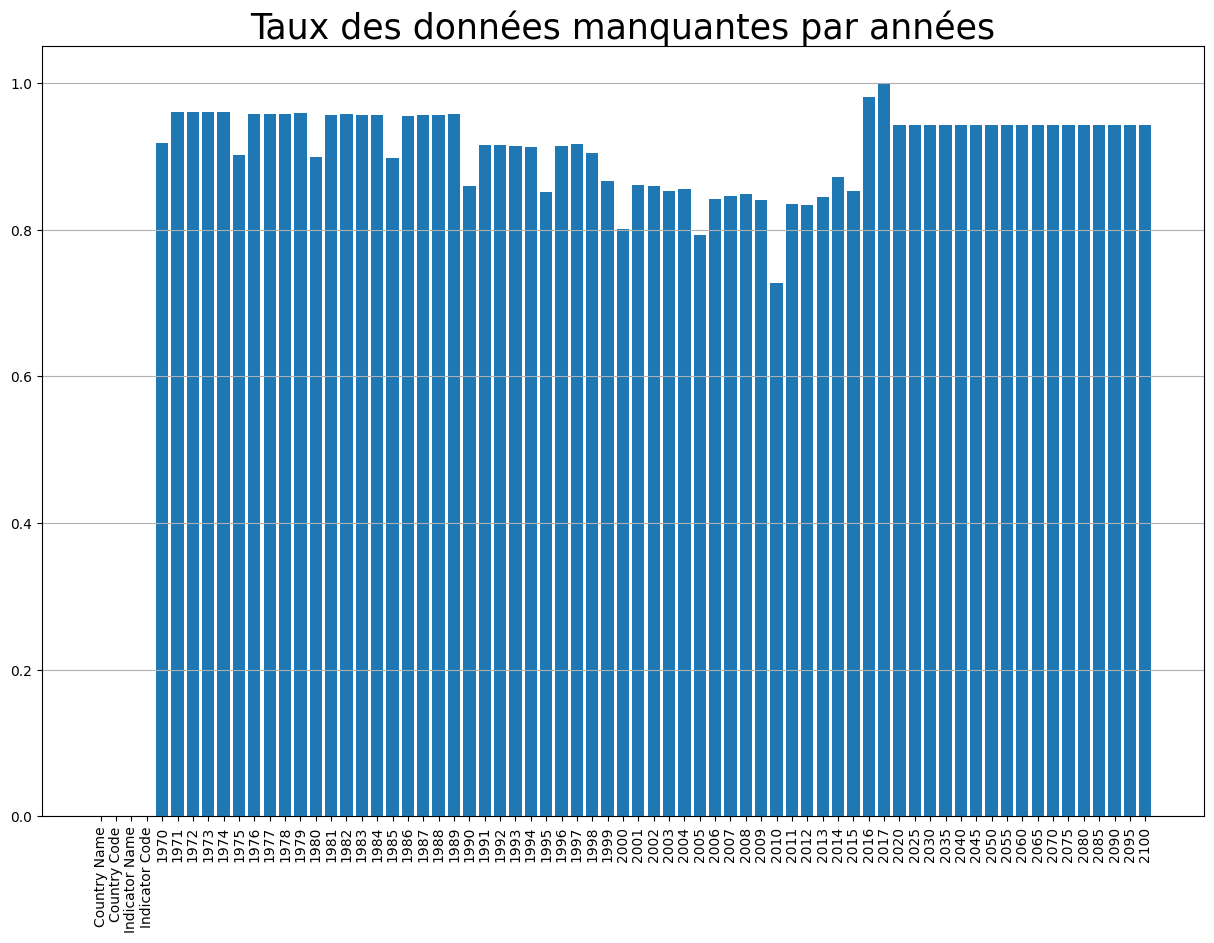

In [49]:
#Taux de valeurs manquantes par colonne du jeu 'EdStatsData'
plt.figure(figsize=[15,10])
plt.title('Taux des données manquantes par années',fontsize=25)
plt.bar(height=EdStatsData.isna().mean(),x=EdStatsData.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()



In [50]:
#Pourcentage de données manquantes par colonne du jeu 'EdStatsData'

NbrLigneRemplisEdStatsData=(EdStatsData["2015"].isnull().values.sum())
NbrLigneTotalEdStatsData= len(EdStatsData.axes[0])

Pourcentage= NbrLigneRemplisEdStatsData/ NbrLigneTotalEdStatsData
print ("Nombre de ligne remplis par colonne :",NbrLigneRemplisEdStatsData)
print ("Nombre tolal des ligne par colnne :",NbrLigneTotalEdStatsData)
print ("Pourcentage de données manquantes par colonne :",round (Pourcentage*100,2),"%")


Nombre de ligne remplis par colonne : 755872
Nombre tolal des ligne par colnne : 886930
Pourcentage de données manquantes par colonne : 85.22 %


[]

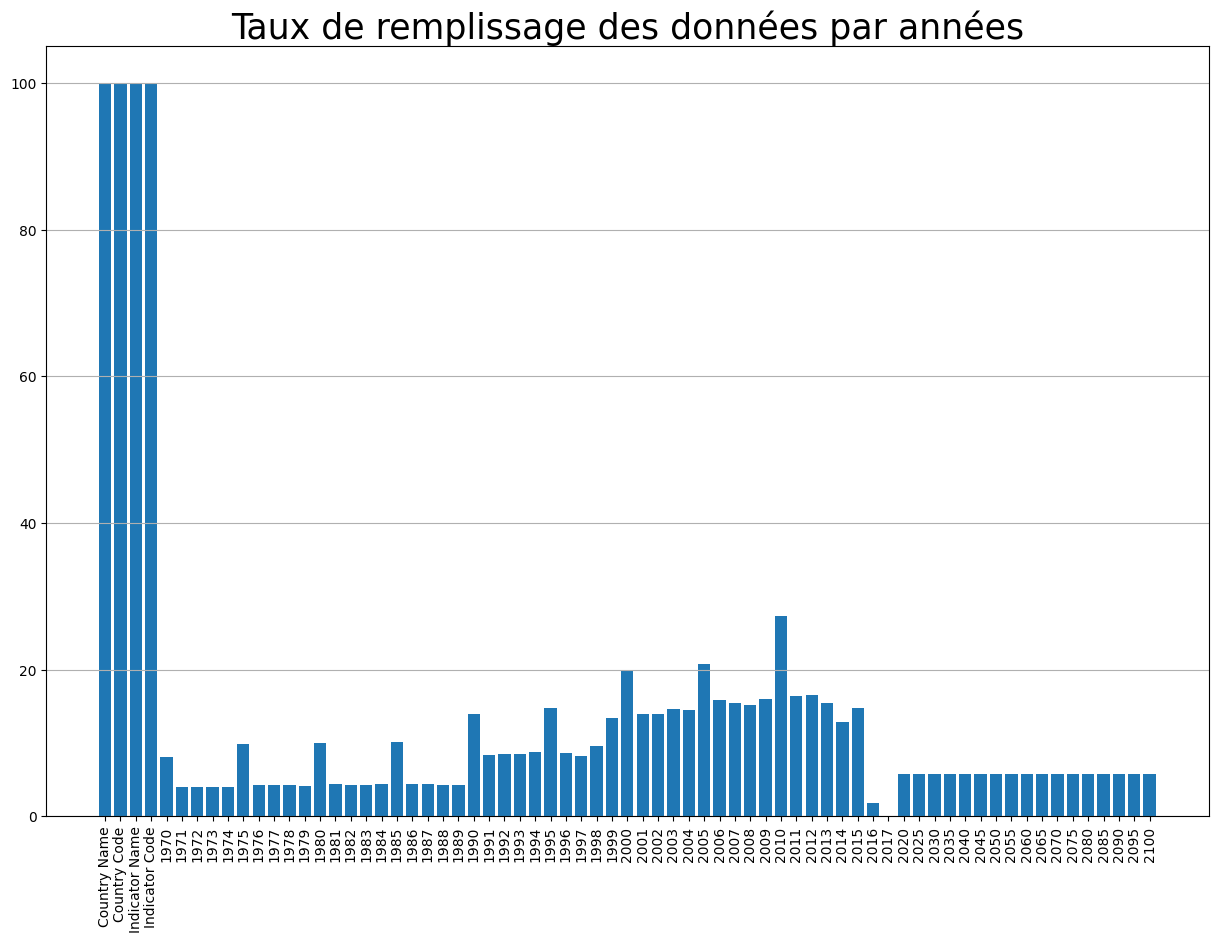

In [51]:
#Pourcentage de remplissage des données par années du jeu de données EdStatsData
plt.figure(figsize=[15,10])
plt.title('Taux de remplissage des données par années',fontsize=25)
plt.bar(height=(EdStatsData.notnull().mean())*100,x=EdStatsData.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()



Text(0.5, 1.0, 'Nombre de données sur la plage de temps [1970-1990]')

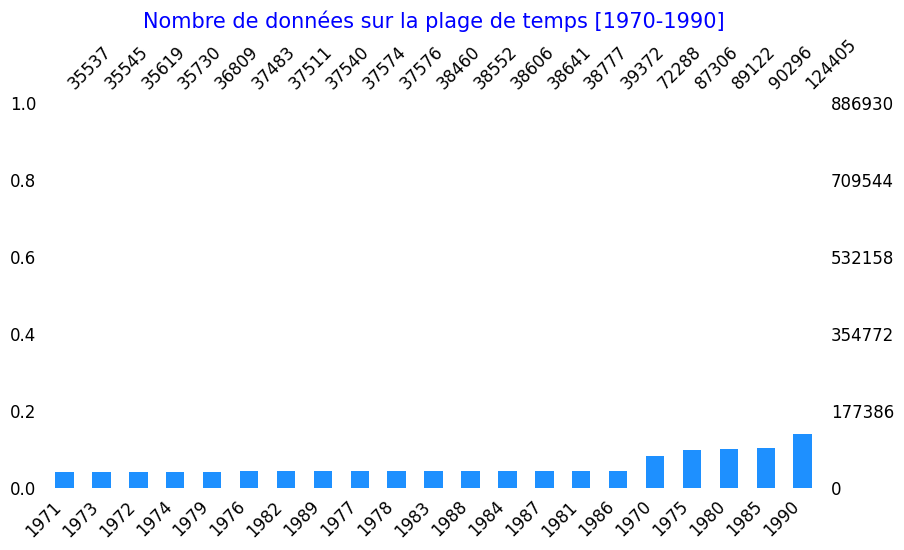

In [52]:
#Nombre de données sur la plage de temps :[1970-1990]
missingno.bar(EdStatsData.iloc[:,4:25], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données sur la plage de temps [1970-1990]',color='blue',fontsize=15)
 


Text(0.5, 1.0, 'Nombre de données sur la plage de temps [1991-2009]')

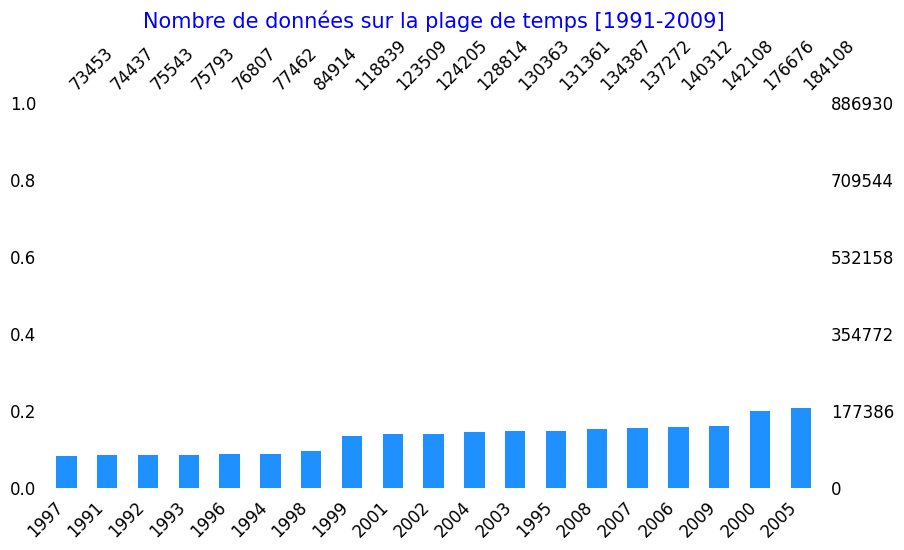

In [53]:
#Nombre de données sur la plage de temps :[1991-2009] 
missingno.bar(EdStatsData.iloc[:,25:44], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données sur la plage de temps [1991-2009]',color='blue',fontsize=15)

Text(0.5, 1.0, 'Nombre de données sur la plage de temps [2010-2020]')

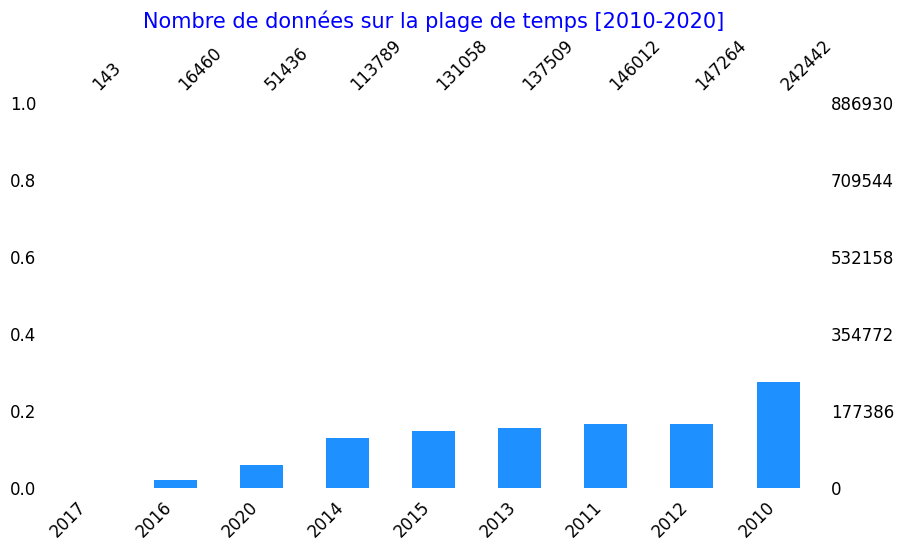

In [54]:
##Nombre de données sur la plage de temps :[2010-2020] :
missingno.bar(EdStatsData.iloc[:,44:53], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données sur la plage de temps [2010-2020]',color='blue',fontsize=15)

Text(0.5, 1.0, 'Nombre de données sur la plage de temps [2025-2100]')

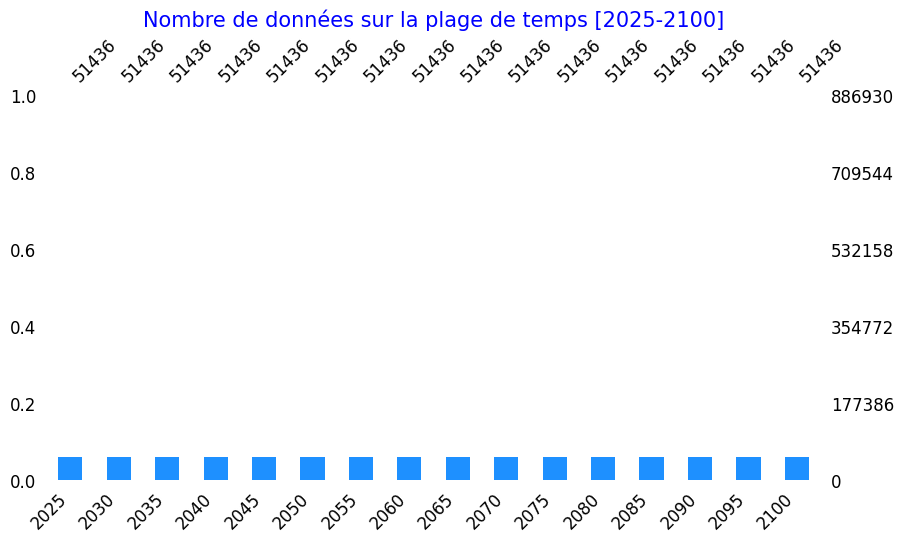

In [55]:
##Nombre de données sur la plage de temps :[2025-2100]:
missingno.bar(EdStatsData.iloc[:,53:69], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données sur la plage de temps [2025-2100]',color='blue',fontsize=15)

* <font size="4"> **Pourcentage des valeurs manquantes dans le fichier EdStatsData.csv est 85.90%**
* <font size="4"> **beaucoup de données manquantes**
* <font size="4"> **L'année 2010 à le taux de remplissage le plus élevé parmis toutes les années de la série.**

## 4.2.2 Données manquantes :EdStatsCountry.csv

In [56]:
# Supression de la colonne  Unnamed: 31
EdStatsCountry = EdStatsCountry.drop(columns='Unnamed: 31', axis = 1)     

#Le pourcentage des données manquantes
print('Le pourcentage des données manquantes est : \n',round(EdStatsCountry.isna().mean().mean()*100,2),'%')

Le pourcentage des données manquantes est : 
 28.28 %


In [57]:
# Taux de données manquantes sur chaque colonne dans l'ordre croissant
MissingEdStatsCountry = EdStatsCountry.isnull().mean()*100
print("Taux de données manquantes sur chaque colonne:\n")
MissingEdStatsCountry.sort_values().head(32)

Taux de données manquantes sur chaque colonne:



Country Code                                          0.000000
Short Name                                            0.000000
Table Name                                            0.000000
Long Name                                             0.000000
WB-2 code                                             0.414938
2-alpha code                                          1.244813
System of National Accounts                          10.788382
Currency Unit                                        10.788382
Region                                               11.203320
Income Group                                         11.203320
Latest population census                             11.618257
National accounts base year                          14.937759
System of trade                                      17.012448
SNA price valuation                                  18.257261
Latest trade data                                    23.236515
IMF data dissemination standard                      24

[]

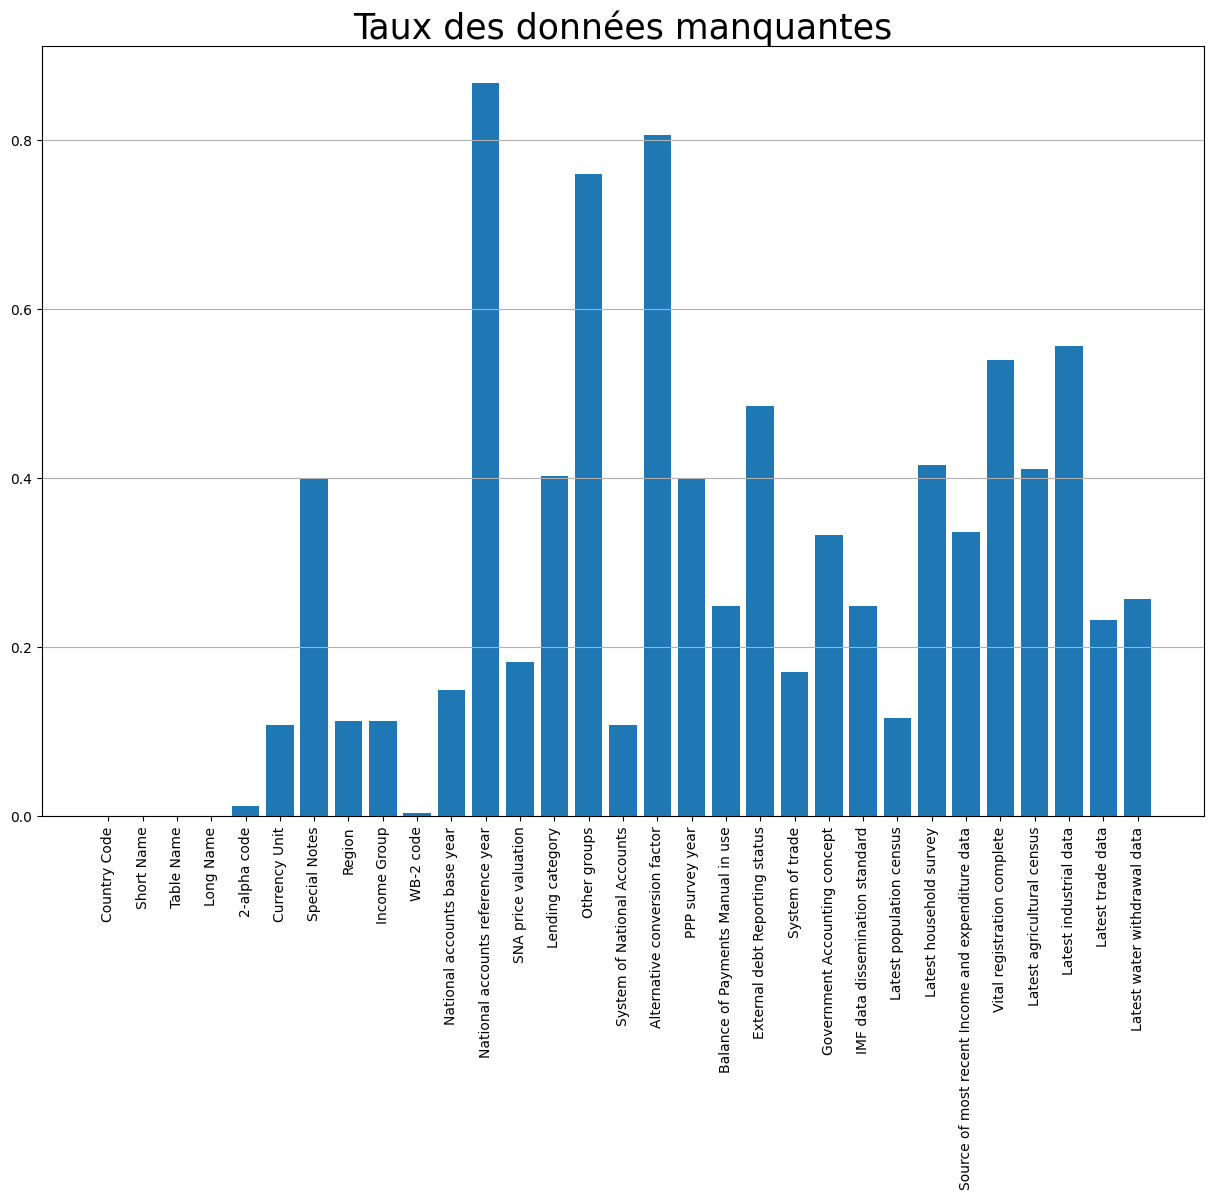

In [58]:
#Taux des données manquantes par colonne de DataSet 'EdStatsCountry'
plt.figure(figsize=[15,10])
plt.title('Taux des données manquantes',fontsize=25)
plt.bar(height=EdStatsCountry.isna().mean(),x=EdStatsCountry.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()


[]

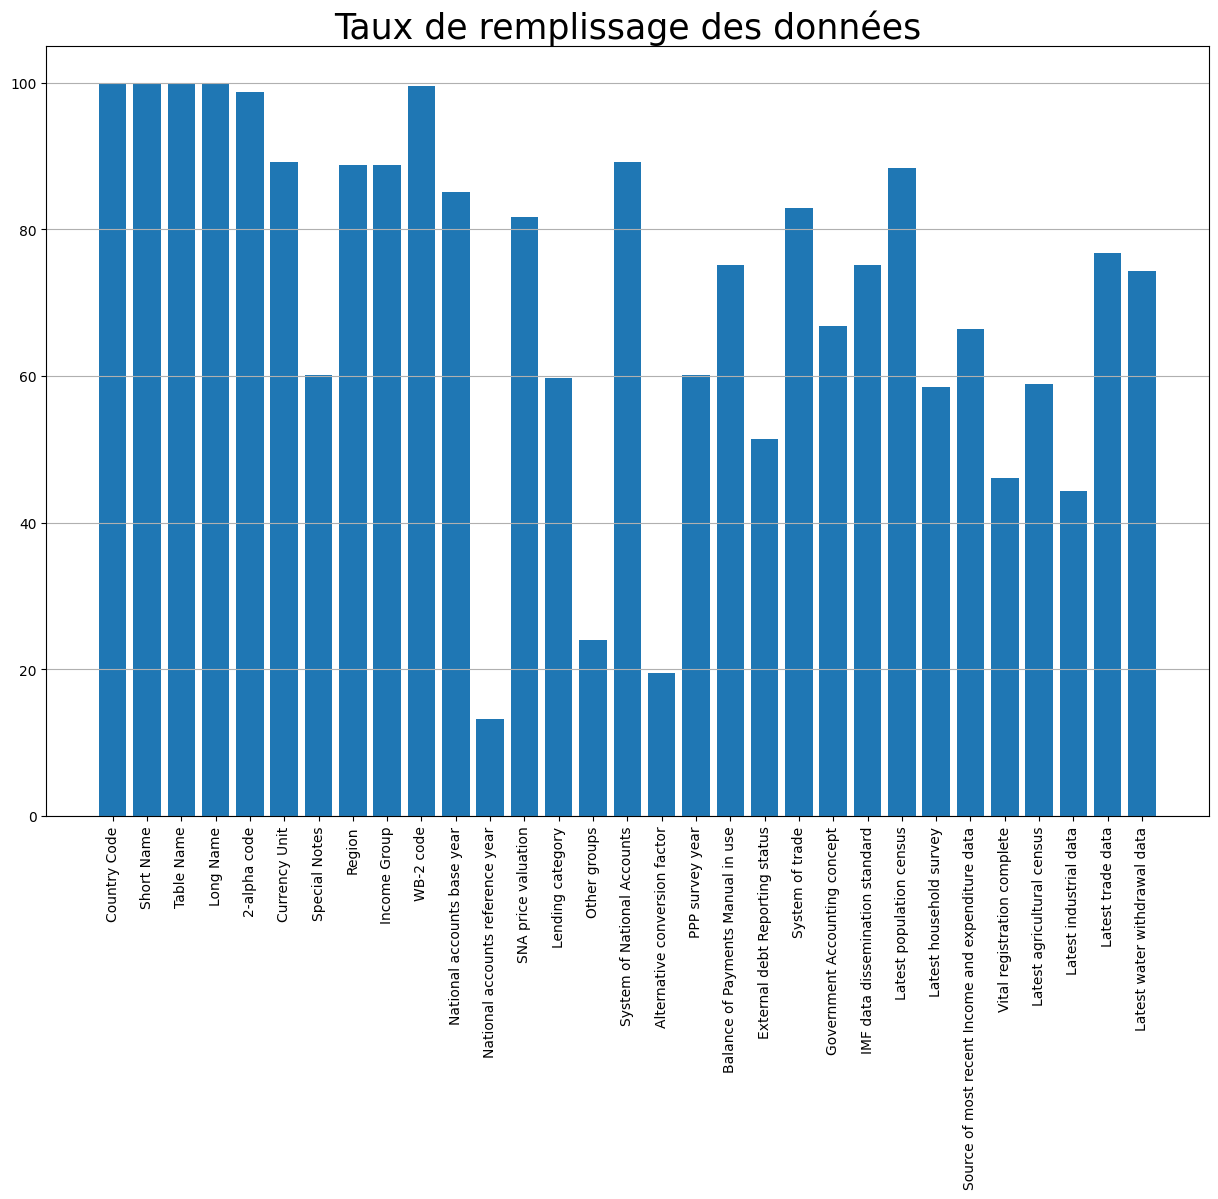

In [59]:
#Pourcentage de remplissage des données par années de DataSet EdStatsCountry
plt.figure(figsize=[15,10])
plt.title('Taux de remplissage des données',fontsize=25)
plt.bar(height=(EdStatsCountry.notnull().mean())*100,x=EdStatsCountry.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

Text(0.5, 1.0, 'Nombre de données sur chaque colonne')

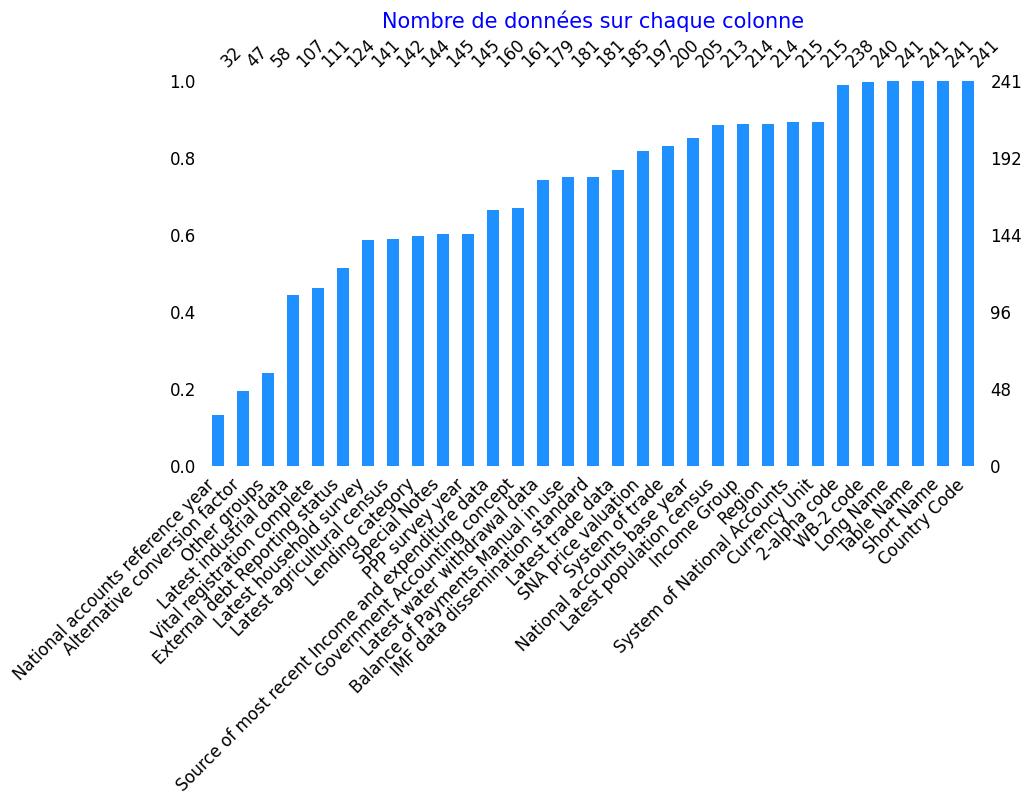

In [60]:
missingno.bar(EdStatsCountry, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données sur chaque colonne',color='blue',fontsize=15)

In [61]:
# Nombre de données manquantes sur chauqe colonne dans l'ordre croissant
EdStatsCountry.isnull().sum(axis=0).sort_values()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
WB-2 code                                              1
2-alpha code                                           3
System of National Accounts                           26
Currency Unit                                         26
Region                                                27
Income Group                                          27
Latest population census                              28
National accounts base year                           36
System of trade                                       41
SNA price valuation                                   44
Latest trade data                                     56
IMF data dissemination standard                       60
Balance of Payments Manual in use                     60
Latest water withdrawal data   

* <font size="4"> **Pourcentage des valeurs manquantes dans le fichier EdStatsCountry.csv est 28.8%**
* <font size="4"> **Les variables "National acounts reference year","Alternative conversion factor" et "Other group" ont beaucoup de données manquantes** 

## 4.2.3 Données manquantes : EdStatsSeries.csv

In [62]:
# Supression de la colonne  Unnamed: 20
EdStatsSeries = EdStatsSeries.drop(columns='Unnamed: 20', axis = 1)     

#Le pourcentage des données manquantes
print('Le pourcentage des données manquantes est : \n',round(EdStatsSeries.isna().mean().mean()*100,2),'%')


Le pourcentage des données manquantes est : 
 70.31 %


In [63]:
# Nombre de valeurs manquantes sur chauqe colonne
print("Nombre des valeurs manquantes sur chauqe colonne :\n")
EdStatsSeries.isnull().sum(axis=0).sort_values() # Nombre de valeurs manquantes sur chauqe colonne

Nombre des valeurs manquantes sur chauqe colonne :



Series Code                               0
Topic                                     0
Indicator Name                            0
Long definition                           0
Source                                    0
Short definition                       1509
Other notes                            3113
Base Period                            3351
Related source links                   3450
Periodicity                            3566
Aggregation method                     3618
Statistical concept and methodology    3642
General comments                       3651
Limitations and exceptions             3651
Development relevance                  3662
Notes from original source             3665
Related indicators                     3665
Unit of measure                        3665
Other web links                        3665
License Type                           3665
dtype: int64

In [64]:
# Taux de données manquantes sur chaque colonne dans l'ordre croissant
MissingEdStatsSerie = EdStatsSeries.isnull().mean()*100
print("Taux de données manquantes sur chaque colonne:\n")
MissingEdStatsSerie.sort_values().head(32)

Taux de données manquantes sur chaque colonne:



Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Long definition                          0.000000
Source                                   0.000000
Short definition                        41.173261
Other notes                             84.938608
Base Period                             91.432469
Related source links                    94.133697
Periodicity                             97.298772
Aggregation method                      98.717599
Statistical concept and methodology     99.372442
General comments                        99.618008
Limitations and exceptions              99.618008
Development relevance                   99.918145
Notes from original source             100.000000
Related indicators                     100.000000
Unit of measure                        100.000000
Other web links                        100.000000
License Type                           100.000000


[]

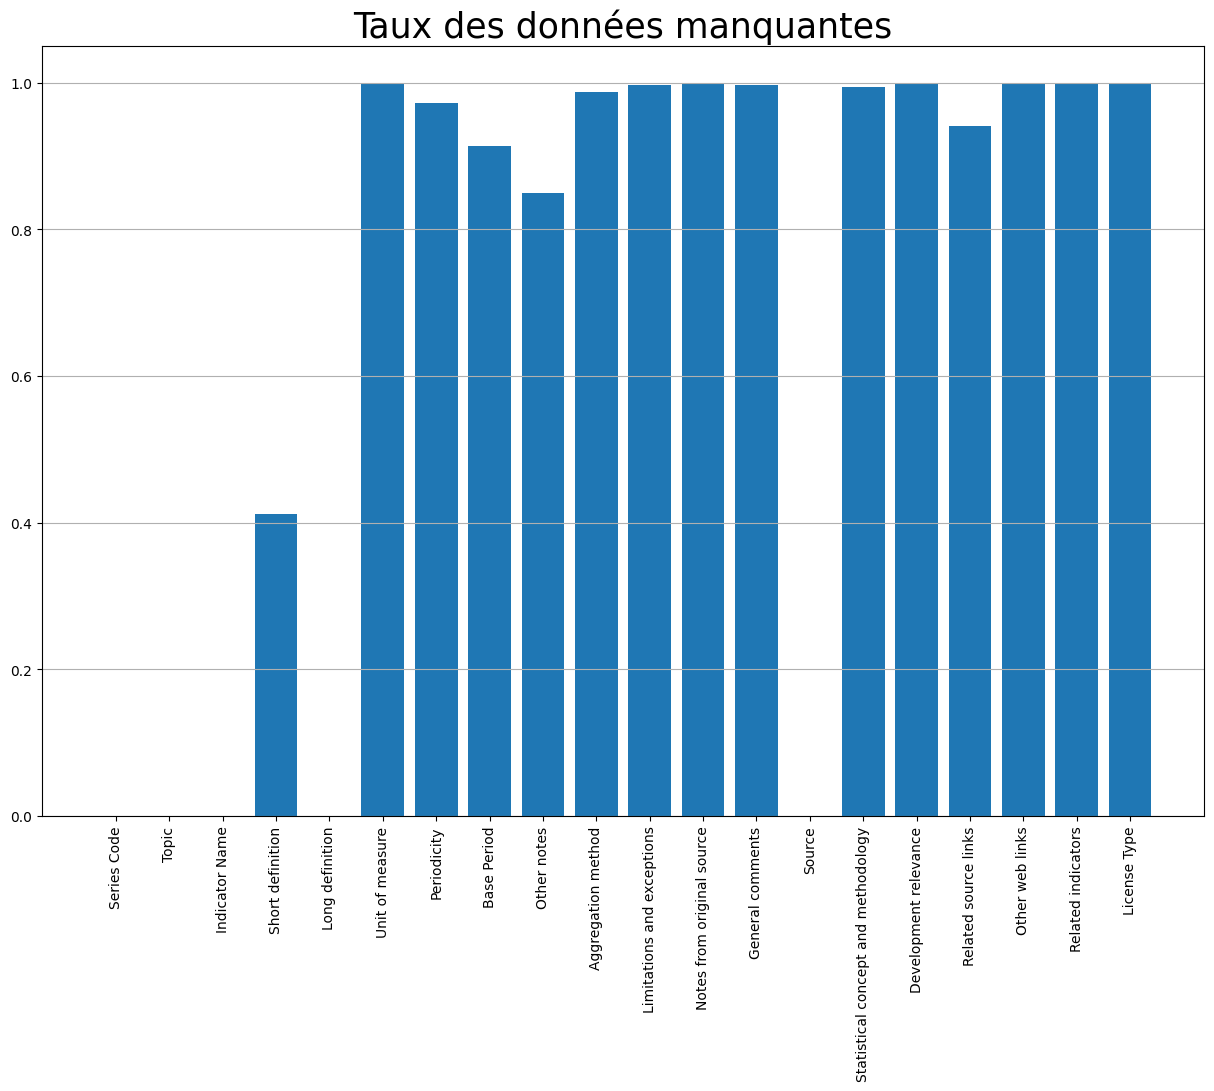

In [65]:
#Taux de valeurs manquantes par colonne du jeu 'EdStatsData'
plt.figure(figsize=[15,10])
plt.title('Taux des données manquantes',fontsize=25)
plt.bar(height=EdStatsSeries.isna().mean(),x=EdStatsSeries.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()


[]

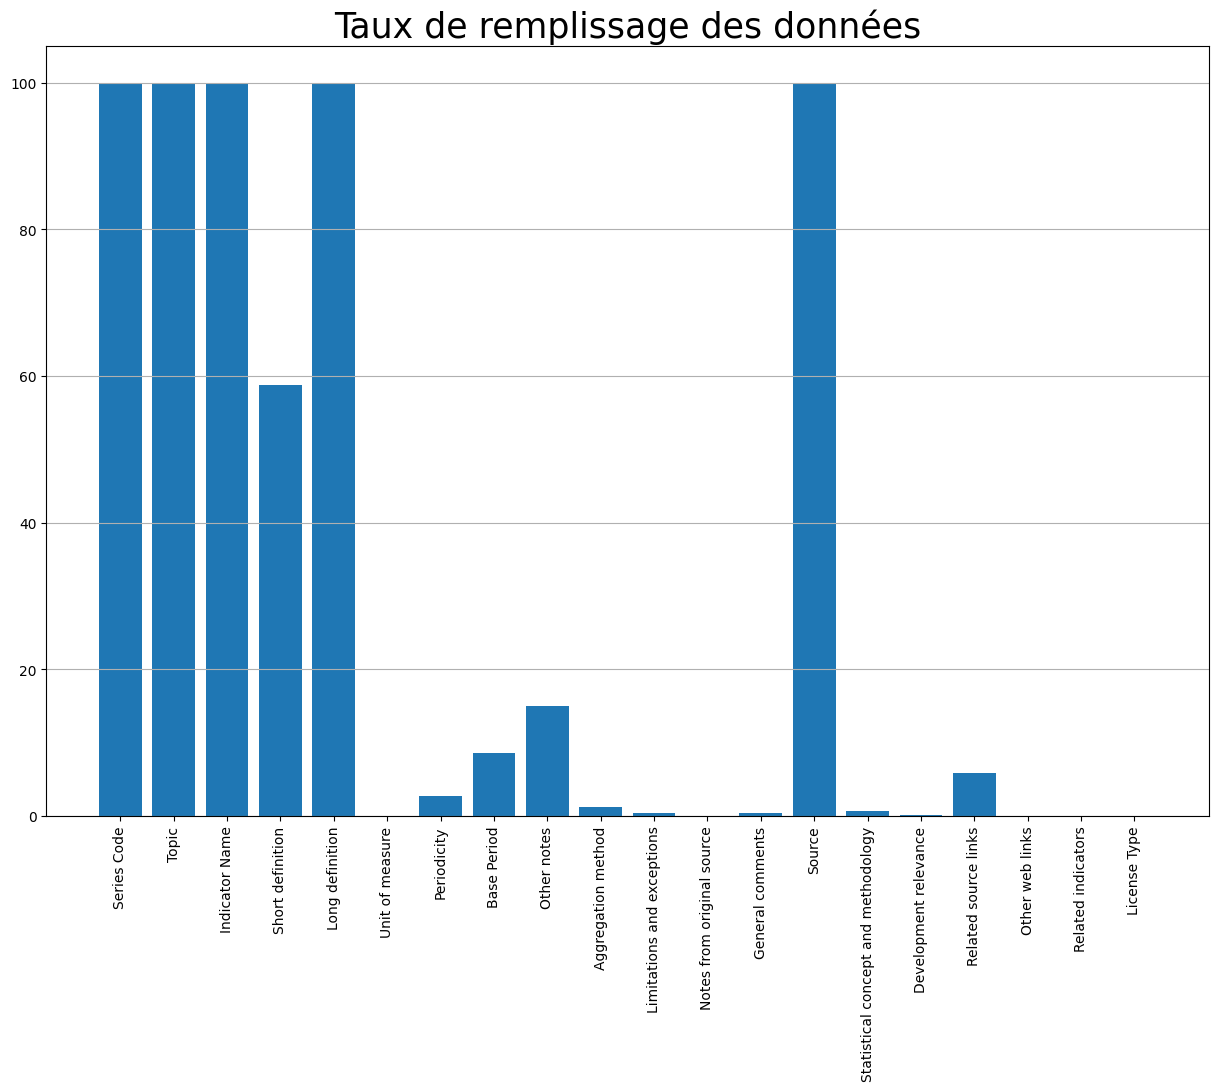

In [66]:
#Pourcentage de remplissage des données par années de DataSet EdStatsCountry
plt.figure(figsize=[15,10])
plt.title('Taux de remplissage des données',fontsize=25)
plt.bar(height=(EdStatsSeries.notnull().mean())*100,x=EdStatsSeries.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

Text(0.5, 1.0, 'Nombre de données par colonne')

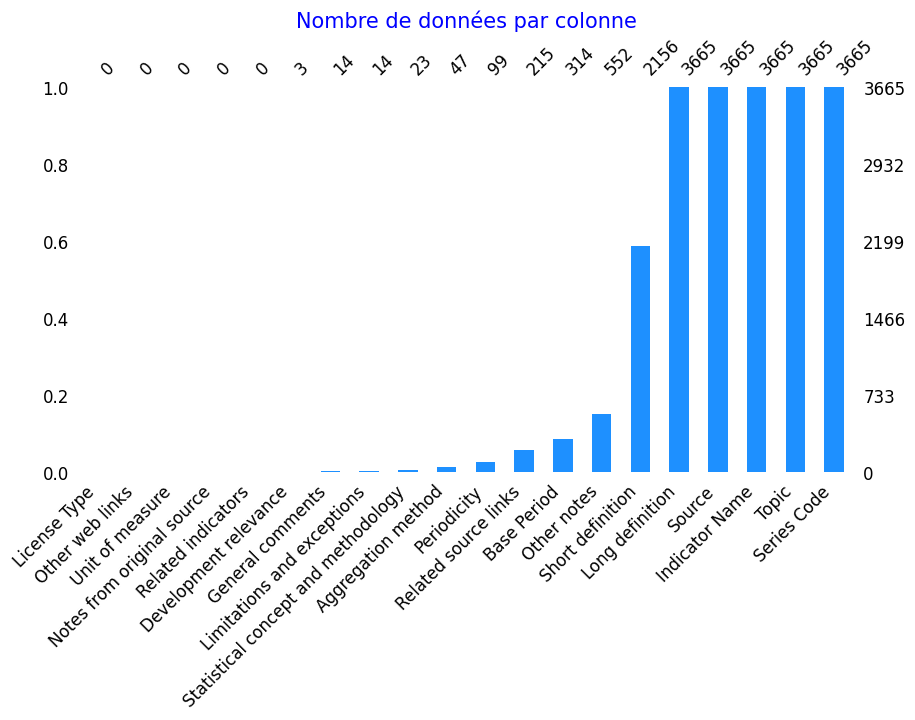

In [67]:
missingno.bar(EdStatsSeries, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données par colonne',color='blue',fontsize=15)

* <font size="4"> **Pourcentage des valeurs manquantes dans le fichier EdStatsSerie.csv est 70.31%**
* <font size="4"> **beaucoup de données manquantes**

## 4.2.4 Données manquantes : EdStatsCountrySeries.csv

In [68]:
# Supression de la colonne  Unnamed: 3
EdStatsCountrySeries = EdStatsCountrySeries.drop(columns='Unnamed: 3', axis = 1)     

#Le pourcentage des données manquantes
print('Le pourcentage des données manquantes est : \n',round(EdStatsCountrySeries.isna().mean().mean()*100,2),'%')

Le pourcentage des données manquantes est : 
 0.0 %


In [69]:
# Recherche de missing data - Taux de missing data
missing = EdStatsCountrySeries.isnull().mean()*100
print(missing)

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
dtype: float64


Text(0.5, 1.0, 'Nombre de données par colonne')

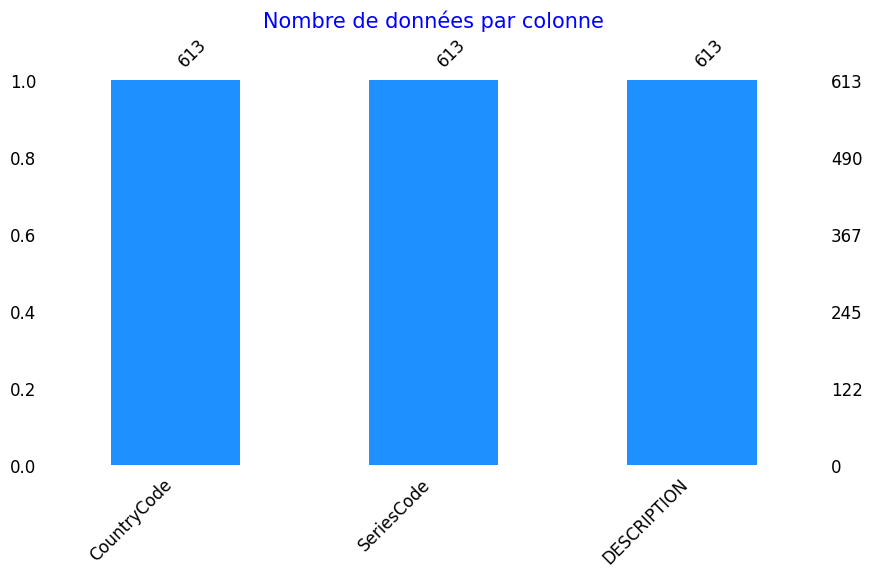

In [70]:
missingno.bar(EdStatsCountrySeries, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données par colonne',color='blue',fontsize=15)

[]

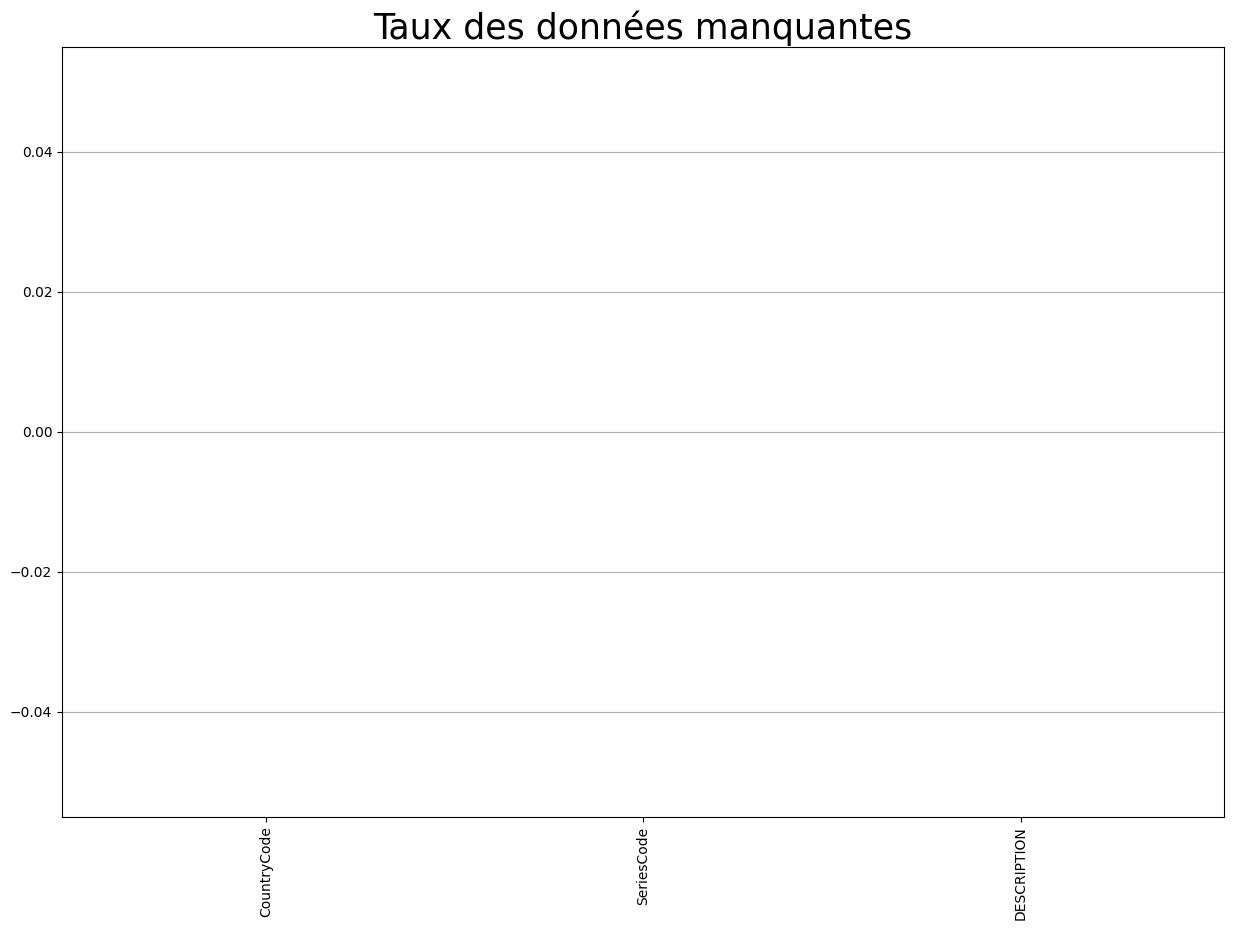

In [71]:
#Taux des données manquantes par colonne du jeu 'EdStatsData'
plt.figure(figsize=[15,10])
plt.title('Taux des données manquantes',fontsize=25)
plt.bar(height= EdStatsCountrySeries.isna().mean(),x= EdStatsCountrySeries.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

In [72]:
Country_series = EdStatsCountrySeries.dropna(axis = 1, how='all')
Country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


* <font size="4"> **Pas de données manquantes dans le fichier EdStatsCountrySeries.csv**


## 4.2.5 Données manquantes : EdStatsFootNote.csv

In [73]:
# Supression de la colonne  Unnamed: 4
EdStatsFootNote = EdStatsFootNote.drop(columns='Unnamed: 4', axis = 1)     

#Le pourcentage des données manquantes
print('Le pourcentage des données manquantes est : \n',round(EdStatsFootNote.isna().mean().mean()*100,2),'%')

Le pourcentage des données manquantes est : 
 0.0 %


In [74]:
# Taux de données manquantes sur chaque colonne dans l'ordre croissant
MissingEdStatsFootNote = EdStatsFootNote.isnull().mean()*100
print("Taux de données manquantes sur chaque colonne:\n")
MissingEdStatsFootNote.sort_values().head(32)

Taux de données manquantes sur chaque colonne:



CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
dtype: float64

Text(0.5, 1.0, 'Nombre de données par colonne')

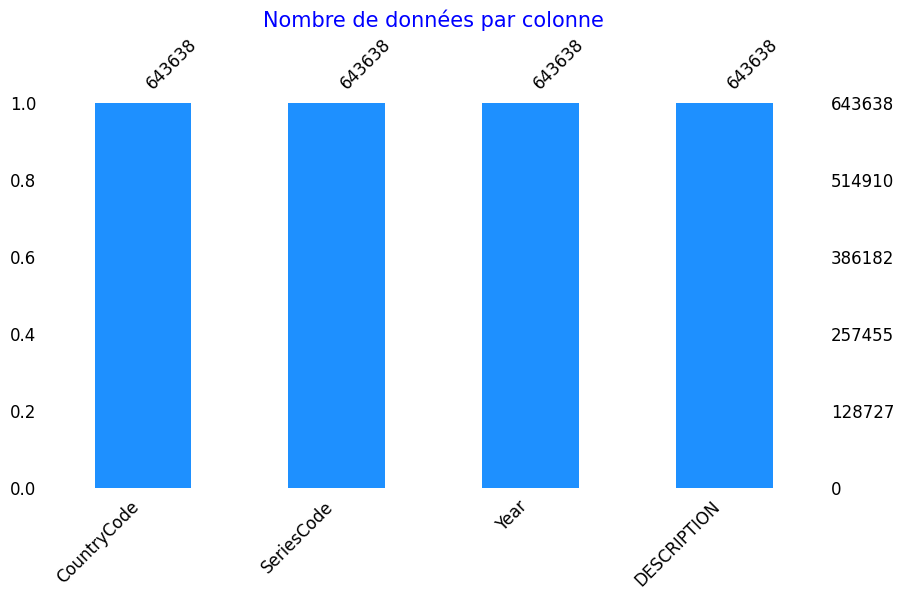

In [75]:
missingno.bar(EdStatsFootNote, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données par colonne',color='blue',fontsize=15)

[]

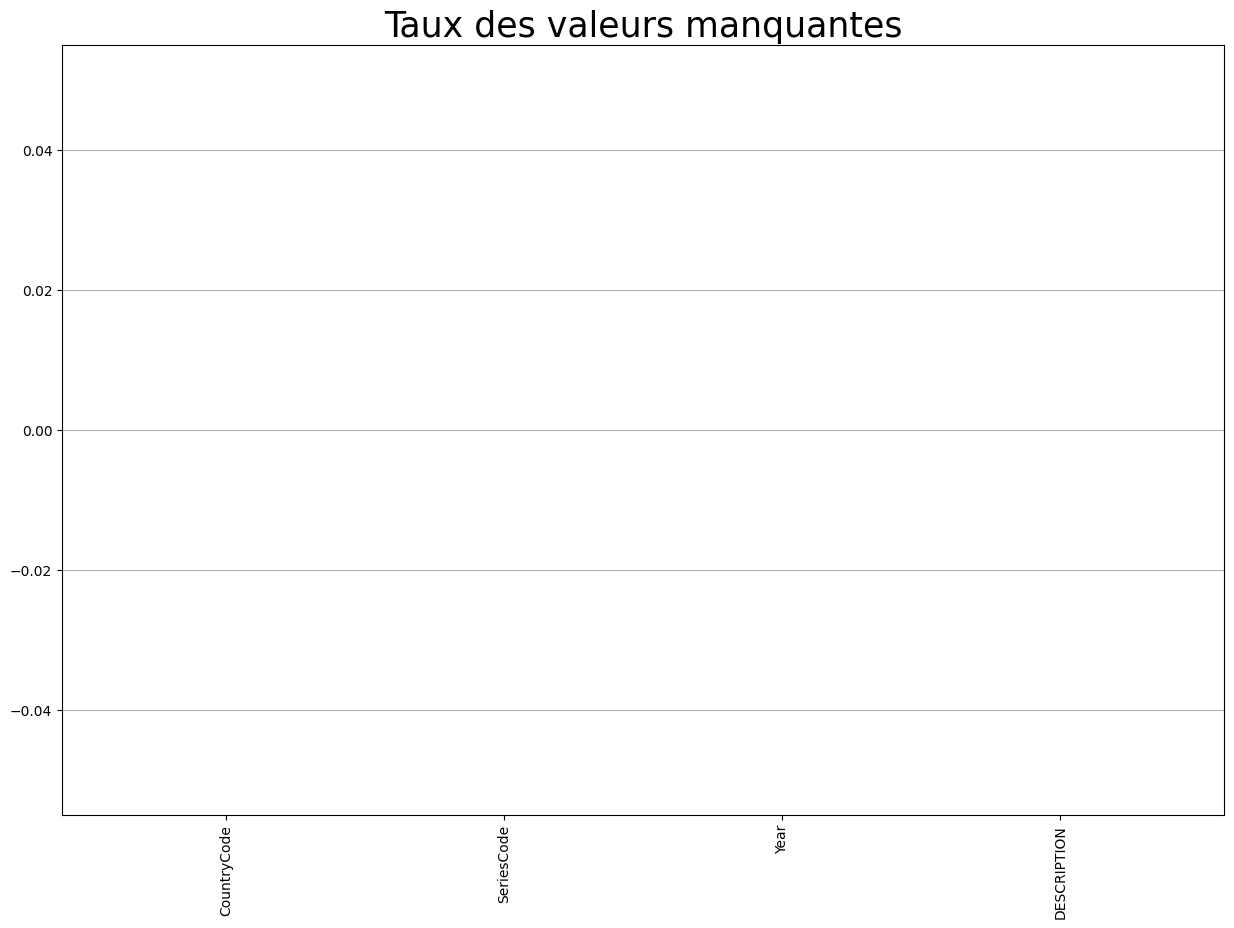

In [76]:
#Taux de valeurs manquantes par colonne du jeu 'EdStatsData'
plt.figure(figsize=[15,10])
plt.title('Taux des valeurs manquantes',fontsize=25)
plt.bar(height= EdStatsFootNote.isna().mean(),x= EdStatsFootNote.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

In [77]:
EdStats_FootNote = EdStatsFootNote.dropna(axis = 1, how='all')
EdStats_FootNote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [78]:
#Pourcentage de valeurs manquantes dans le dataframe
nan_percents_EdStatsFootNote = round(EdStatsFootNote.isna().sum().sum()/EdStatsFootNote.size * 100,0)
print(nan_percents_EdStatsFootNote,"%")

0.0 %


* <font size="4"> **Pas de données manquantes**


## **Parie 5** : Nettoyage des données 

## 5.1  Nettoyage  "des années"

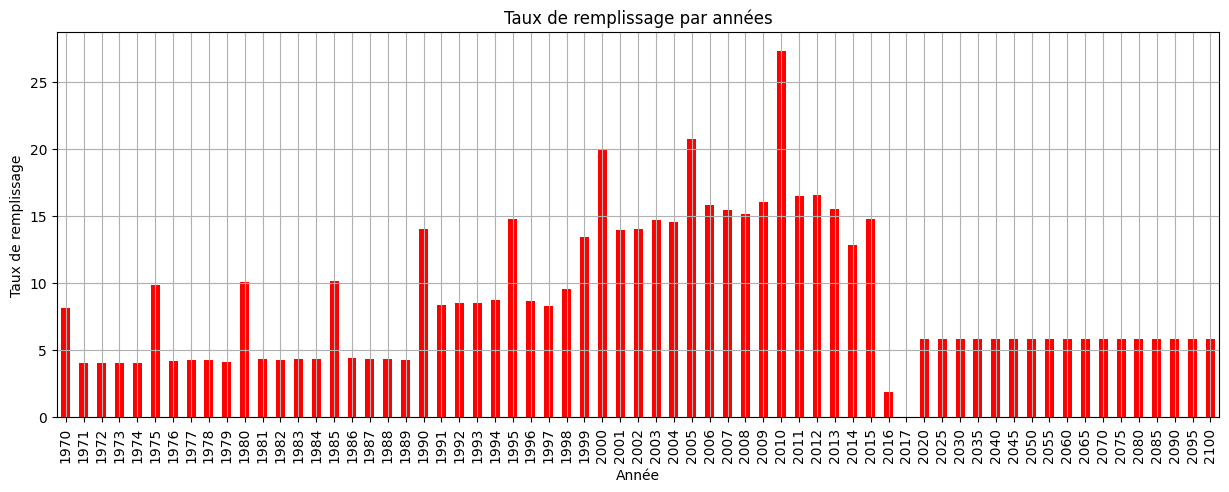

In [79]:
# Calcul du taux de remplissage par année
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 5))
G = gridspec.GridSpec(1, 1)

ax = plt.subplot(G[0, :])
taux_remplissage = 100-EdStatsData.loc[:,'1970':'2100'].isna().mean()*100
ax = taux_remplissage.plot(kind='bar', color='red')
ax.set_title('Taux de remplissage par années')
ax.set_xlabel('Année')
ax.set_ylabel('Taux de remplissage')
ax.grid(True)
plt.show()

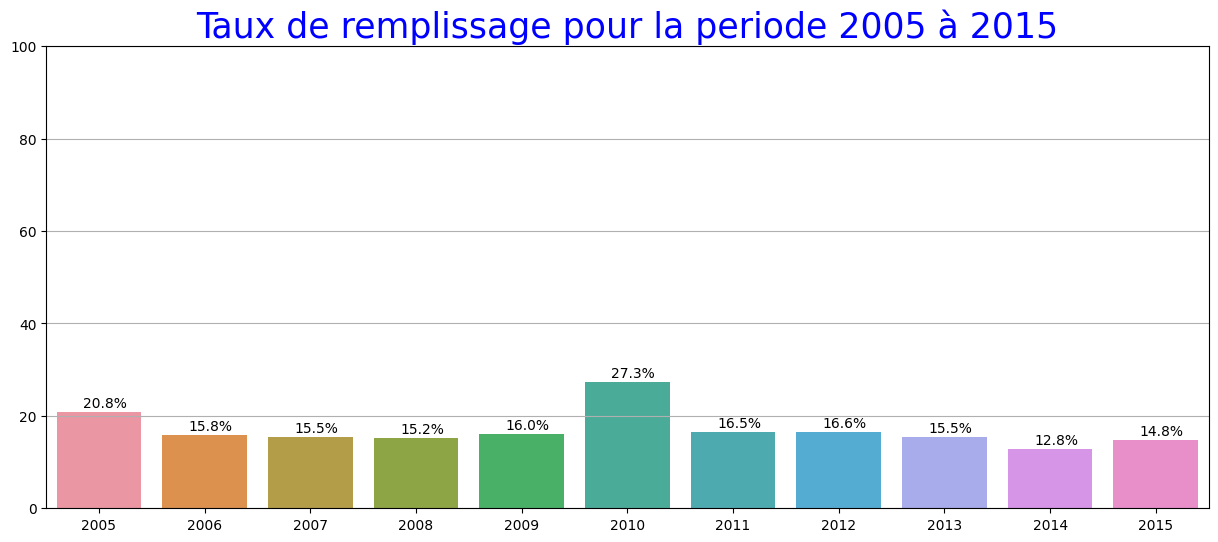

In [80]:
# Le pourcentage de données par tranche de 10 ans
df_data_copyData=EdStatsData.copy()
plt.figure(figsize=(15, 6))
plt.title('Taux de remplissage pour la periode 2005 à 2015',color='blue',fontsize=25)
ax=sns.barplot(y = (1 - df_data_copyData[list(df_data_copyData.loc[:,'2005':'2015'])].isna().mean())*100,
            x = df_data_copyData[list(df_data_copyData.loc[:,'2005':'2015'])].columns)
plt.ylim(0,100)

for p in ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()+0.25
    txt_y = p.get_height()+1
    ax.text(txt_x,txt_y,txt)

plt.grid(axis='y')
plt.show()

In [81]:
# Affichage la plage des année entre 2005 et 2016
Annee_listData  = [str(i) for i in np.arange(2005,2016, 1)]
# Annee_listData est la liste des années pour la suite de l'étude 
print(len(Annee_listData), "années à étudier :", Annee_listData)

11 années à étudier : ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [82]:
#Pourcentage de remplissage  par année
m1=(EdStatsData["2010"].notnull().values.sum())
m2= len(EdStatsData.axes[0])

Pourcentage= m1/ m2
print ("m1",m1)
print ("m2",m2)
print ((Pourcentage*100),"%")

m1 242442
m2 886930
27.334964427857894 %


In [83]:
#df_data.to_csv("df_data_2015.csv")
EdStatsData.shape

(886930, 69)

* <font size="4">  **J'ai gardé que les données de la periode 2005 à 2015**

* <font size="4">  **Suppression des colonnes pour les années avant 2005 et après 2015**

In [84]:
#Nombre de colonnes initiales de dataset EdStatsData
Nombre_Colonne_EdStatsData=EdStatsData.shape[1]
print("Nombre de colonnes initiales de dataset EdStatsData : " ,Nombre_Colonne_EdStatsData,"Colonnes")

Nombre de colonnes initiales de dataset EdStatsData :  69 Colonnes


In [85]:
# Suppression des colonnes des années avant 2005 et après 2015 et la derniere colonne 'Unnamed' (colonne vide)
df_data=EdStatsData.copy()
df_data= df_data.drop(columns = df_data.loc[:,"1970":"2004"].columns)
df_data= df_data.drop(columns = df_data.loc[:,"2016":].columns)
# affichage de qcq lignes aprés suppression
df_data.shape

(886930, 15)

In [86]:
#Nombre de colonnes initiales de dataset EdStatsData
Nombre_Colonne_AprSupp_EdStatsData=df_data.shape[1]
print("Nombre de colonnes après la suppression des années avant 2005 et après 2015:" ,Nombre_Colonne_AprSupp_EdStatsData,"Colonnes")

Nombre de colonnes après la suppression des années avant 2005 et après 2015: 15 Colonnes


In [87]:
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'],
      dtype='object')

Text(0.5, 1.0, 'Nombre de données par colonne')

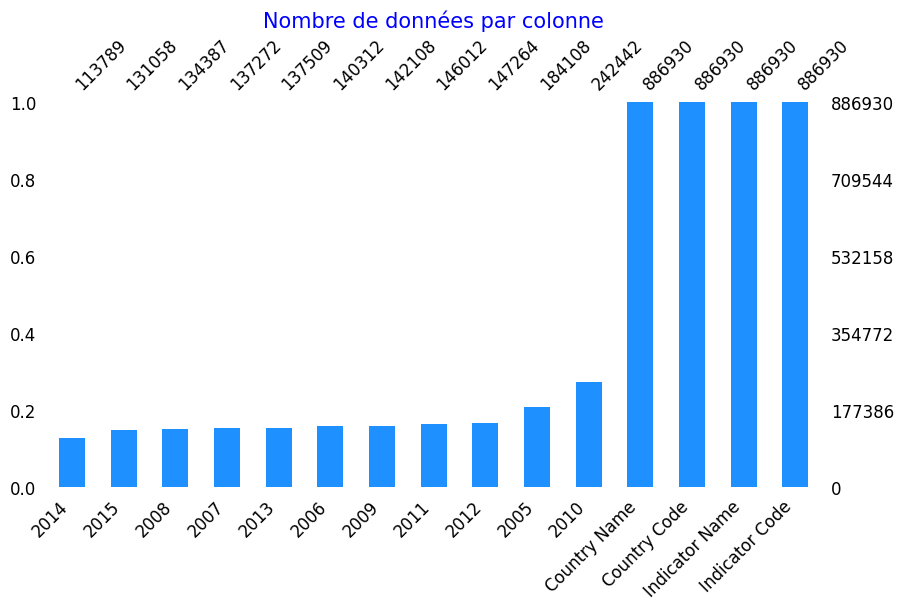

In [88]:
missingno.bar(df_data, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données par colonne',color='blue',fontsize=15)

In [89]:
df_data.describe() 

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05
mean,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10
std,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11
min,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00
25%,5.720000e+00,1.277624e+01,1.268661e+01,1.233467e+01,1.181939e+01,1.322703e+00,1.216330e+01,1.100000e+01,1.306113e+01,1.614639e+01,4.100000e-01
50%,5.031512e+01,9.981849e+01,1.000000e+02,1.000000e+02,9.925039e+01,2.046020e+01,9.853510e+01,9.759012e+01,1.000000e+02,1.000000e+02,5.235000e+01
75%,2.993150e+04,1.187198e+05,1.343790e+05,1.453855e+05,1.180412e+05,3.121000e+03,1.065065e+05,1.038168e+05,1.426480e+05,1.636440e+05,6.153575e+04
max,7.624045e+13,8.031840e+13,8.469145e+13,8.711022e+13,8.677516e+13,9.134676e+13,9.506314e+13,9.999473e+13,1.054580e+14,1.108060e+14,1.156198e+14


## 5.2 Nettoyage "des lignes vides"

In [90]:
Nombre_Ligne_EdStatsData=df_data.shape[0]
print ("Nombre de lignes initiales :",Nombre_Ligne_EdStatsData,"lignes")

Nombre de lignes initiales : 886930 lignes


In [91]:
#Suppression des lignes vides
annee = [str(i) for i in np.arange(2005,2016, 1)]
Nombre_Ligne_vide_EdStatsData =df_data[df_data.loc[:,annee].isna().all(1)]
print("Nombre de lignes vides à supprimer :",Nombre_Ligne_vide_EdStatsData.shape[0],"lignes")

Nombre de lignes vides à supprimer : 547750 lignes


In [92]:
# Nombre de ligne restant

df_data=Nombre_Ligne_ApresSupp_EdStatsData= df_data.dropna(how = 'all', subset = Annee_listData)
print("Nombre de ligne restant :",Nombre_Ligne_ApresSupp_EdStatsData.shape[0],"lignes") 


Nombre de ligne restant : 339180 lignes


In [93]:

TbSuppLigneEdStatsData = pd.DataFrame({ 'Nombre de lignes initiales ':Nombre_Ligne_EdStatsData,
                                        'Nombre de ligne vide':Nombre_Ligne_vide_EdStatsData.shape[0],
                                        'Nombre de lignes restants':Nombre_Ligne_ApresSupp_EdStatsData.shape[0]},
                        index=["EdStatsData"] ,)

print('Tableau récapitulatif de nettoyage des lignes vides:')
TbSuppLigneEdStatsData 

Tableau récapitulatif de nettoyage des lignes vides:


,Nombre de lignes initiales,Nombre de ligne vide,Nombre de lignes restants
EdStatsData,886930,547750,339180


In [94]:
df_data.shape

(339180, 15)

## **Partie 6**: Identification des indicateurs pertinents 

## 6.1 Taux de remplissage de chaque un indicateur

In [95]:
# Calculer le nombre de données de chaque indicateur par année
df_data_indicateurs = df_data.groupby('Indicator Code')[Annee_listData].count()
df_data_indicateurs=df_data_indicateurs.reset_index()

In [96]:
print ("Nombre des indicateurs:",df_data_indicateurs.shape[0],"indicateurs")

Nombre des indicateurs: 3635 indicateurs


In [97]:
# Ajouter une colonne 'Taux_remplissage' pour calculer le pourcentage de remplissage par indicateur
# sur toutes les années et tous les pays.

df_data_indicateurs['Taux_remplissage']=round((df_data_indicateurs[Annee_listData].sum(axis=1))*100/(df_data['Country Code'].nunique()*len(Annee_listData)),2)

df_data_indicateurs

,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Taux_remplissage
0,BAR.NOED.1519.FE.ZS,144,0,0,0,0,144,0,0,0,0,0,10.82
1,BAR.NOED.1519.ZS,144,0,0,0,0,144,0,0,0,0,0,10.82
2,BAR.NOED.15UP.FE.ZS,144,0,0,0,0,144,0,0,0,0,0,10.82
3,BAR.NOED.15UP.ZS,144,0,0,0,0,144,0,0,0,0,0,10.82
4,BAR.NOED.2024.FE.ZS,144,0,0,0,0,144,0,0,0,0,0,10.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,UIS.XUNIT.USCONST.3.FSGOV,52,52,57,60,62,70,74,61,47,21,0,20.89
3631,UIS.XUNIT.USCONST.4.FSGOV,31,32,35,31,33,37,35,33,19,10,0,11.12
3632,UIS.XUNIT.USCONST.56.FSGOV,72,71,70,75,86,94,87,74,55,21,0,26.48
3633,XGDP.23.FSGOV.FDINSTADM.FFD,80,70,79,89,92,102,100,81,74,39,1,30.32


In [98]:
# Filtrer les données en utilisant un seuil de 60% comme taux de remplissage des indicateurs
df_data=pd.merge(df_data,df_data_indicateurs[['Indicator Code','Taux_remplissage']],on ='Indicator Code', how ='inner')
df_data=df_data[df_data['Taux_remplissage']>60]
Indicteurs_restants=df_data['Indicator Code'].nunique()
Pays_restant=df_data['Country Code'].nunique()
print('Indicateurs restants :',Indicteurs_restants)
print('Pays restants :',Pays_restant)

Indicateurs restants : 373
Pays restants : 242


In [99]:

TbSuppIndicaEdStatsData = pd.DataFrame({ 'Nombre des indicteurs initiales ':df_data_indicateurs.shape[0],
                                        'Nombre des indicateurs restants': Indicteurs_restants,
                                        'Nombre de pays restants':  Pays_restant},
                        index=["EdStatsData"] ,)

print('Tableau récapitulatif de nettoyage des indicateurs:')
TbSuppIndicaEdStatsData

Tableau récapitulatif de nettoyage des indicateurs:


,Nombre des indicteurs initiales,Nombre des indicateurs restants,Nombre de pays restants
EdStatsData,3635,373,242


## 6.2 Les mots clés pour trouver des indicateurs pertinents 

In [100]:
# Ajouter la colonne 'Long definition' pour pouvoir chercher des mots-clés pertinents 
df_data=pd.merge(df_data,EdStatsSeries[['Indicator Name','Long definition']],on ='Indicator Name', how='inner')

In [101]:
df_data.shape

(62537, 17)

In [102]:
# Afficher quelques lignes après le merge
df_data.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Taux_remplissage,Long definition
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,63.26,Total number of students of the official prima...
1,East Asia & Pacific,EAS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.181770,94.709732,95.674072,95.730942,96.068748,96.166069,96.364761,96.322609,96.094063,96.207962,NaN,63.26,Total number of students of the official prima...
2,East Asia & Pacific (excluding high income),EAP,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.885033,94.360008,95.386147,95.439133,95.812241,95.923203,96.133148,96.097107,95.901901,96.025803,NaN,63.26,Total number of students of the official prima...
3,Euro area,EMU,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,98.748299,98.812798,99.046333,99.086693,99.073898,99.117859,98.986740,99.071228,99.104248,98.919312,NaN,63.26,Total number of students of the official prima...



- **L'idée est maintenant de trouver les indicateurs qui nous intéressent parmi les 373 indicateurs proposés.**

**Choisir les indicateurs qui définissent :**
* <font size="4">  **L'accès à internet** : (mots-clés: Internet)
* <font size="4">  **La tranche d'âge**   : (mots-clés: school,education, 15,20 et 24)
* <font size="4">  **Pouvoir d'achat**    : (mots-clés: gdp et economy)
* <font size="4">  **Population** : (mots-clés: demography)


## 6.3 Indicateurs retenus

In [103]:
# Définir une liste de mots-clés suivant les critères choisis
liste_motscles=['demography','15','20','24','gdp','economy','internet','school','education']

In [104]:
# mettre la colonne 'Long definition' en minuscule pour chercher un seul mot-clé (par exemple 'internet' pour 'internet' et ' Internet')
df_data['Long definition'] = df_data['Long definition'].str.lower()
# chercher les mots-clés définis dans la colonne 'Long Definition'
liste_indicateurs=df_data[df_data['Long definition'].str.contains("|".join(liste_motscles))]['Indicator Name'].unique()
# Afficher le nombre d'indicateurs trouvés
print('Nous avons', len(liste_indicateurs), 'indicateurs qui peuvent nous intéressent')

Nous avons 178 indicateurs qui peuvent nous intéressent


In [105]:
df_data.shape

(62537, 17)

In [106]:
# Affiher la liste des indicateurs trouvés
print('La liste des indicateurs qui peuvent nous intéresser après  sélection par mots cles:')
for k in liste_indicateurs:
    print(k)

La liste des indicateurs qui peuvent nous intéresser après  sélection par mots cles:
Adjusted net enrolment rate, primary, both sexes (%)
Enrolment in Grade 1 of primary education, both sexes (number)
Enrolment in Grade 1 of primary education, female (number)
Enrolment in Grade 2 of primary education, both sexes (number)
Enrolment in Grade 2 of primary education, female (number)
Enrolment in Grade 3 of primary education, both sexes (number)
Enrolment in Grade 3 of primary education, female (number)
Enrolment in Grade 4 of primary education, both sexes (number)
Enrolment in Grade 4 of primary education, female (number)
Enrolment in lower secondary education, both sexes (number)
Enrolment in lower secondary education, female (number)
Enrolment in lower secondary general, both sexes (number)
Enrolment in lower secondary general, female (number)
Enrolment in pre-primary education, both sexes (number)
Enrolment in pre-primary education, female (number)
Enrolment in primary education, both s

**Après avoir analyser la liste des indicateurs trouvés, j'ai choisi seulement 5 indicateurs de la liste  :**

* <font size="4"> **Indicateurs de taux de scolarisation (lycée /université)** :'Gross enrolment ratio, secondary, both sexes (%),
'Gross enrolment ratio, tertiary, both sexes (%)'

* <font size="4"> **Indicateurs économique(Revenu moyen du pays)** :'GNI per capita, PPP (current international $)'   
* <font size="4"> **Indicateurs d'infrastructure (Accès à internet)** :Internet users (per 100 people)
* <font size="4"> **Indicateur sur la  population** :'Population, ages 15-24, total'







## 6.4 Le code des indicateurs retenus 

In [107]:
liste_nom_indicateurs_finale=['Internet users (per 100 people)',
                              'GNI per capita, PPP (current international $)',           
                              'Gross enrolment ratio, secondary, both sexes (%)',
                              'Gross enrolment ratio, tertiary, both sexes (%)',
                              'Population, ages 15-24, total']
# chercher le code de correspondant à chaque indicateur
liste_code_indicateurs_finale=[]
for k in liste_nom_indicateurs_finale:
    liste_code_indicateurs_finale.append(df_data.loc[df_data['Indicator Name']==k,'Indicator Code'].unique()[0])
print('La liste des codes des indicateurs est : ')
liste_code_indicateurs_finale

La liste des codes des indicateurs est : 


['IT.NET.USER.P2',
 'NY.GNP.PCAP.PP.CD',
 'SE.SEC.ENRR',
 'SE.TER.ENRR',
 'SP.POP.1524.TO.UN']

In [108]:
liste_nom_indicateurs_finale=['Internet','Economie_PIB','Lycéens','Etudiants','Population_15_24']

# Le code des indicateurs retenus :

### Economie :
 
* **NY.GNP.PCAP.PP.CD** 
### Education :
* **SE.SEC.ENRL** = Enrolment in secondary education, both sexes (number) 
* **SE.TER.ENRL** = Enrolment in tertiary education, all programmes, both sexes (number)

### Démographie :
* **SP.POP.1564.TO** = population totale de la tranche d'age 15-24 ans

### Utilisation internet :
* **IT.NET.USER.P2** = internet user (per 100 people)

## 6.3 Suppression des indicateurs non retenus

In [109]:
# Suppresion des indicateurs non retenus
df_data=df_data[df_data['Indicator Code'].isin(liste_code_indicateurs_finale)]

print('Le nombre d\'indicateurs restants :', df_data['Indicator Code'].nunique())
print('Le nombre de pays restants :', df_data['Country Code'].nunique())

Le nombre d'indicateurs restants : 5
Le nombre de pays restants : 235


## 6.4 Nombre des pays par indicateur

In [110]:
# ré-indexer la base après suppression de données
df_data=df_data.reset_index(drop = True)


In [111]:
# Vérification de la représentation des indicateurs sur les pays
print("Sur un total de ", df_data['Country Code'].nunique(), " pays, nous avons :")
df_data.loc[df_data["Indicator Code"].isin(liste_code_indicateurs_finale),:].groupby(['Indicator Code']).count()['Country Name']

Sur un total de  235  pays, nous avons :


Indicator Code
IT.NET.USER.P2       229
NY.GNP.PCAP.PP.CD    214
SE.SEC.ENRR          214
SE.TER.ENRR          197
SP.POP.1524.TO.UN    191
Name: Country Name, dtype: int64

## 6.5 Remplacer les valeurs manquantes 

In [112]:
# Tourner le dataframe
df_data=df_data.T

# Remplacer la valeur manquante par la valeur précédente
df_data.loc['2005':'2015',:].fillna(method='ffill', inplace=True)

# Remplacer la valeur manquante par la prochaine valeur
df_data.loc['2005':'2015',:].fillna(method='bfill', inplace=True)

# Retourner au dataframe d'origine
df_data=df_data.T

#Nombre des valeurs manquantes
print("Nombre des valeurs manquantes:")
df_data.isnull().sum().sum()

Nombre des valeurs manquantes:


0

In [113]:
df_data2=df_data.copy()

In [114]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Taux_remplissage,Long definition
0,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,11369.47658,12356.841903,13132.708815,13824.485684,13852.502783,14284.023177,14996.156034,15846.498202,16141.560252,16141.560252,16141.560252,87.0,gni per capita based on purchasing power parit...
1,East Asia & Pacific,EAS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,7979.803858,8800.95114,9767.941355,10405.054186,10758.261713,11738.672488,12601.058098,13499.991278,14389.108336,15330.472007,16149.931154,87.0,gni per capita based on purchasing power parit...
2,East Asia & Pacific (excluding high income),EAP,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,5148.206568,5846.666888,6693.465068,7354.394893,7865.504692,8709.694279,9525.4158,10384.409752,11165.939759,12118.246706,12921.630707,87.0,gni per capita based on purchasing power parit...
3,Euro area,EMU,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,30153.765259,32673.170524,34437.870873,35617.680976,34957.646314,36017.493732,37606.582828,38000.713691,39183.09099,40161.569361,41230.027134,87.0,gni per capita based on purchasing power parit...
4,Europe & Central Asia,ECS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,20223.547172,22345.170045,23839.674401,25347.50264,24756.355149,25894.746869,27580.72937,28280.604601,29258.848142,29915.207287,30338.930111,87.0,gni per capita based on purchasing power parit...


## 6.6  Chargement du fichier final «df_data_final » en mémoire

In [115]:
df_data.to_csv("df_data_final.csv")


In [116]:
df_data.shape

(1045, 17)

## **Partie 7:** Exploitation des données de l'année 2015


## 7.1 Choix de l'année "2015" 

* <font size="4"> **J'ai travaillé avec les valeurs de l'année 2015 pour avoir des informations récentes le plus possible**

In [117]:
df_data= df_data.pivot(index='Country Name',columns='Indicator Code',values='2015')
print("Nombre des pays :",df_data.shape[0],"pays")
print("Nombre des indicateurs :",df_data.shape[1],"indicateurs")


Nombre des pays : 235 pays
Nombre des indicateurs : 5 indicateurs


## 7.2 Suppression des pays avec au moins un indicateur manquant

In [118]:
# Supprimer les pays dont au moins un indicateur est manquant
df_data = df_data.dropna()
df_data.head()

Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Afghanistan,8.26,1880.0,55.644409,8.6628,7252785.0
Albania,63.252933,11340.0,95.765488,58.109951,556269.0
Algeria,38.2,14170.0,99.860191,36.922279,6467818.0
Angola,12.4,6270.0,28.89872,9.30802,4259352.0
Antigua and Barbuda,70.0,21010.0,102.70546,23.48624,13588.0


In [119]:
print("Nombre des pays :",df_data.shape[0],"pays")
print("Nombre des indicateurs :",df_data.shape[1],"indicateurs")

Nombre des pays : 155 pays
Nombre des indicateurs : 5 indicateurs


# 7.2 Exploration des indicateurs les plus pertinents.

## 7.2.1 Démographie : SP.POP.1524.TO.UN Population, ages 15-24, total

In [120]:
Pop_15_24 = df_data.groupby('Country Name')['SP.POP.1524.TO.UN'].agg('max').reset_index()
Pop_15_24.columns=['Country Name', 'SP.POP.1524.TO.UN']
Pop_15_24 = Pop_15_24.sort_values('SP.POP.1524.TO.UN', ascending= False)

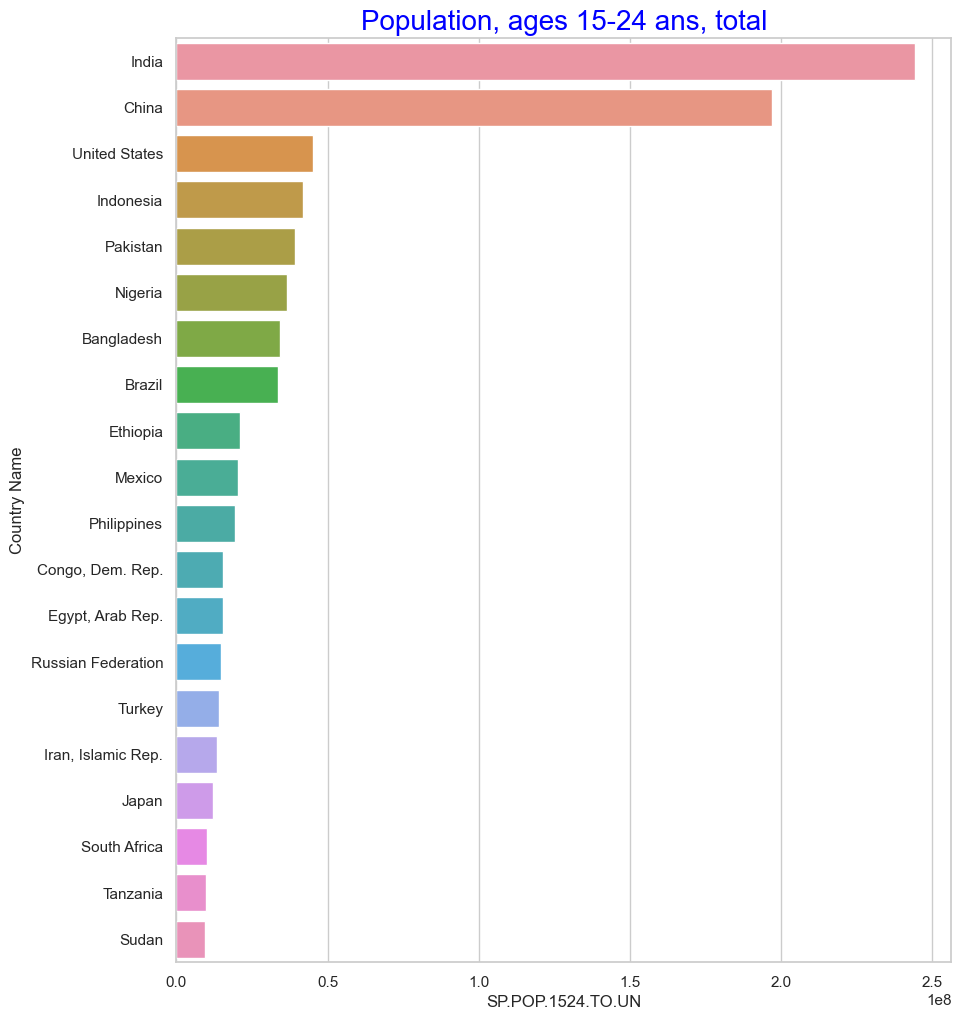

In [121]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,12))
plt.title('Population, ages 15-24 ans, total',color='blue', size=20)
plot = sns.barplot(y = Pop_15_24.iloc[:20]['Country Name'], 
                   x = Pop_15_24.iloc[:20]['SP.POP.1524.TO.UN'])
plt.show()

# 
- **Dans notre graphique, les pays très peuplés comme l’Inde, la Chine, les États-Unis, l’Indonésie apparaissent en première place, tandis que les pays européens se positionnent en dernière position car le vieillissement de la population est instalé depuis longtemps en Europe. (depuis 1990) et fait de la population de ce continent l'une des plus agée de la planète**



## 7.2.2 Internet : IT.NET.USER.P2 "Internet users (per 100 people)"

In [122]:
Internet_users = df_data.groupby('Country Name')['IT.NET.USER.P2'].agg('max').reset_index()
Internet_users.columns=['Country Name', 'IT.NET.USER.P2']
Internet_users = Internet_users.sort_values('IT.NET.USER.P2', ascending= False)

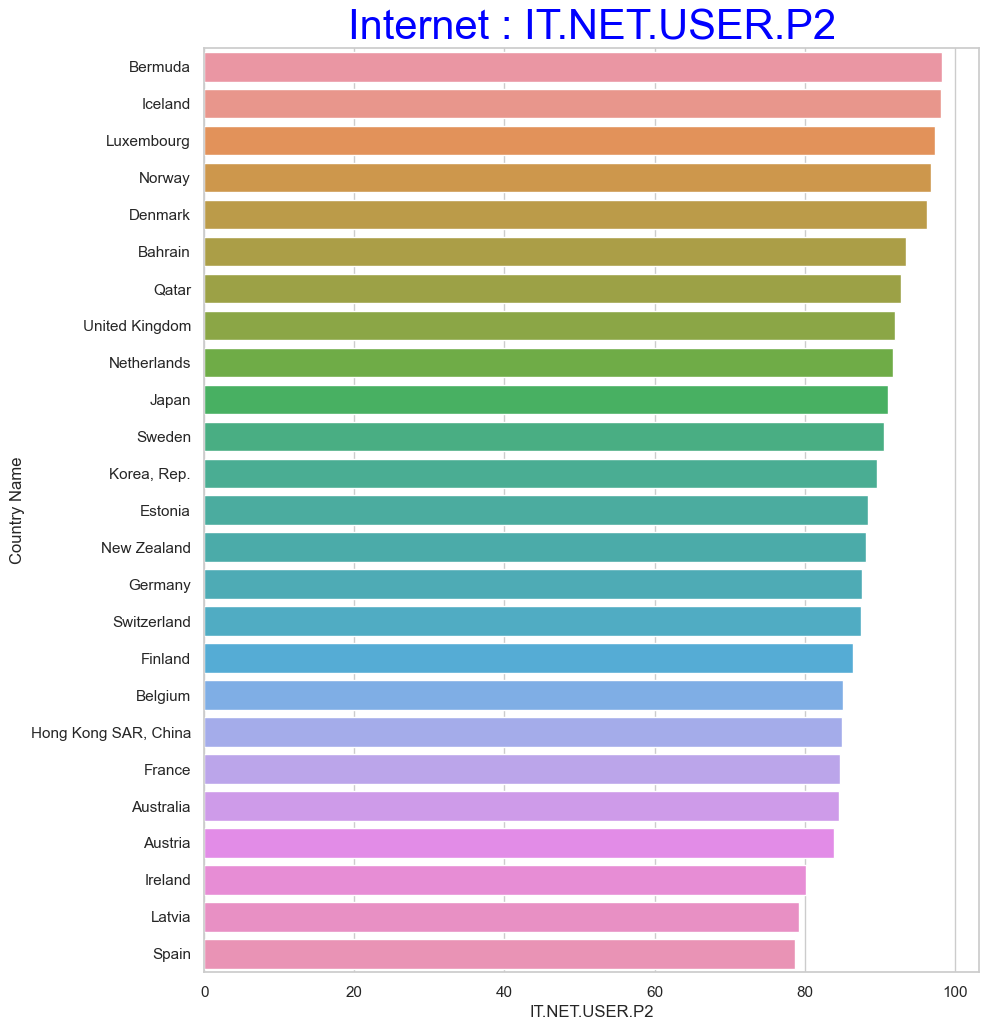

In [123]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,12))
plt.title('Internet : IT.NET.USER.P2',color='blue', size=30)
plot = sns.barplot(y = Internet_users.iloc[:25]['Country Name'], 
                   x = Internet_users.iloc[:25]['IT.NET.USER.P2'])
plt.show()

# 
- **Tous les pays de notre liste comptent plus de 80 % d’internautes ,ce sont donc tous des clients potentiels pour l’entreprise.****


## 7.2.3 Education : SE.SEC.ENRR "Taux brut de scolarisation des lycéens"

In [124]:
Educ_lyc = df_data.groupby('Country Name')['SE.SEC.ENRR'].agg('max').reset_index()
Educ_lyc.columns=['Country Name', 'SE.SEC.ENRR']
Educ_lyc = Educ_lyc.sort_values('SE.SEC.ENRR', ascending= False)


In [125]:
Educ_lyc

,Country Name,SE.SEC.ENRR
13,Belgium,166.808472
51,Finland,149.456085
136,Sweden,140.458832
7,Australia,137.564789
107,Netherlands,135.473801
...,...,...
3,Angola,28.89872
146,Uganda,23.23654
29,Chad,22.40279
109,Niger,20.749821


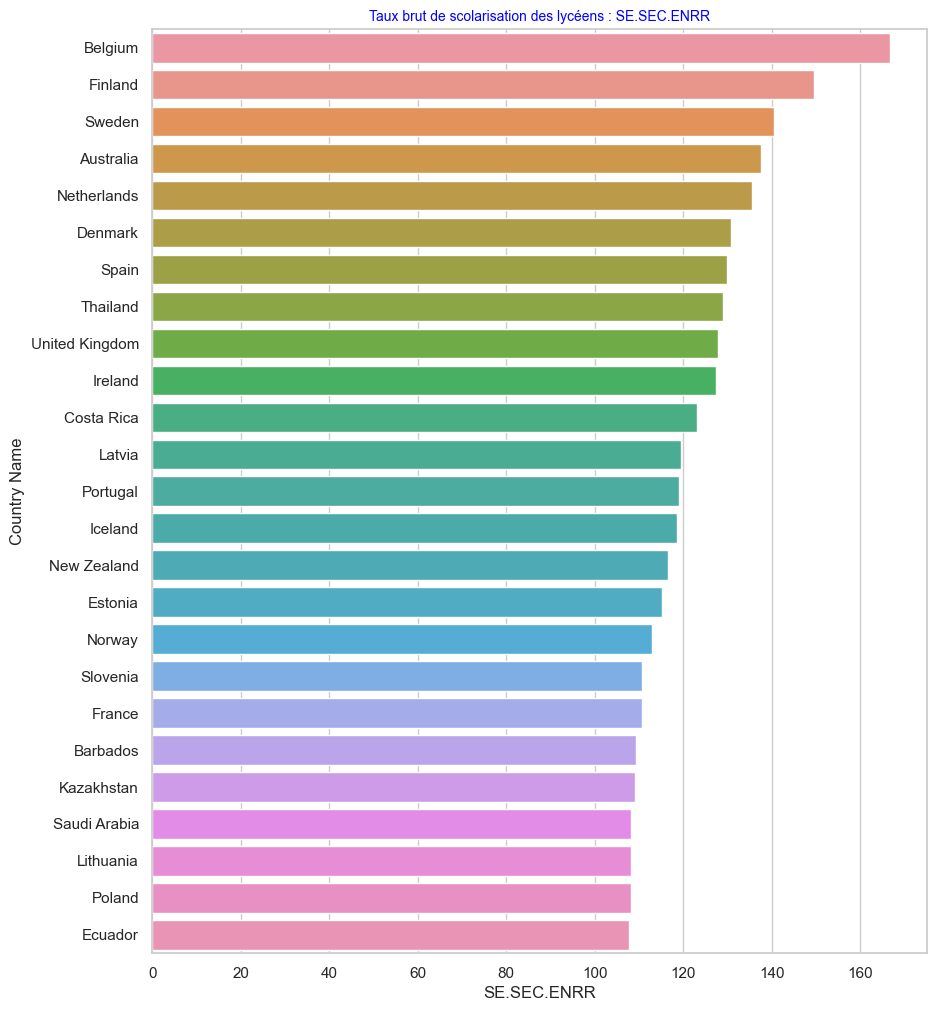

In [126]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,12))
plt.title('Taux brut de scolarisation des lycéens : SE.SEC.ENRR',color='blue', size=10)
plot = sns.barplot(y = Educ_lyc.iloc[:25]['Country Name'], 
                   x = Educ_lyc.iloc[:25]['SE.SEC.ENRR'])
plt.show()

# 
- **Le taux brut de scolarisation (TBS) est le total des inscriptions à un niveau
  d’éducation donné, quel que soit l’âge, exprimé en pourcentage de la population 
  au sein de la tranche d’âge officielle correspondant à ce niveau d’éducation.
  Le TBS peut dépasser 100% en raison d'une inscription précoce ou tardive et / ou d'un redoublement**

## 7.2.4 Education : SE.TER.ENRR "Taux brut de scolarisation des étudiants"

In [127]:
Educ_etudiant = df_data.groupby('Country Name')['SE.TER.ENRR'].agg('max').reset_index()
Educ_etudiant.columns=['Country Name', 'SE.TER.ENRR']
Educ_etudiant = Educ_etudiant.sort_values('SE.TER.ENRR', ascending= False)


In [128]:
Educ_etudiant.head(10)

,Country Name,SE.TER.ENRR
57,Greece,113.871788
144,Turkey,94.7323
79,"Korea, Rep.",93.179138
58,Grenada,91.147743
7,Australia,90.306503
130,Spain,89.670143
30,Chile,88.577293
12,Belarus,87.940742
51,Finland,87.289703
149,United States,85.795776


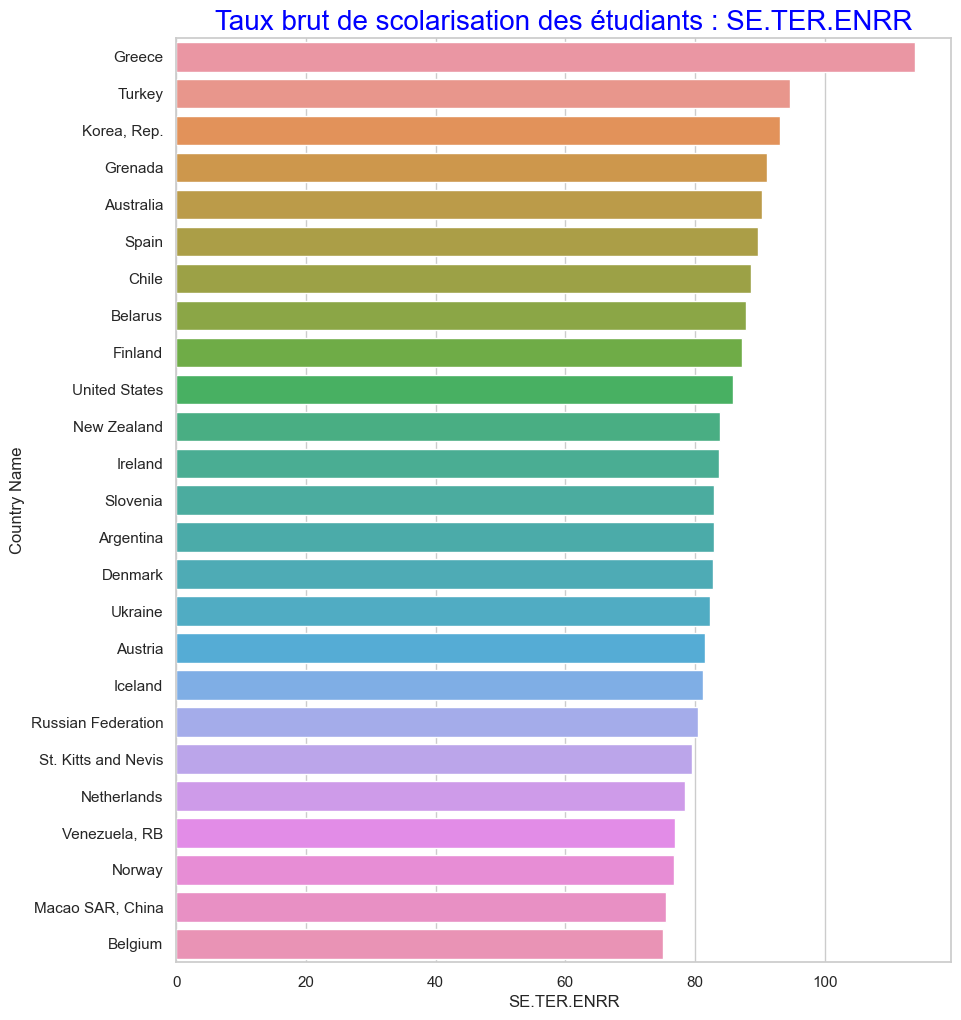

In [129]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,12))
plt.title('Taux brut de scolarisation des étudiants : SE.TER.ENRR',color='blue', size=20)
plot = sns.barplot(y = Educ_etudiant.iloc[:25]['Country Name'], 
                   x = Educ_etudiant.iloc[:25]['SE.TER.ENRR'])
plt.show()

## 7.2.5 Economie : NY.GNP.PCAP.PP.CD "PIB par habitant " 

In [130]:
PIB_Habitant = df_data.groupby('Country Name')['NY.GNP.PCAP.PP.CD'].agg('max').reset_index()
PIB_Habitant.columns=['Country Name', 'NY.GNP.PCAP.PP.CD']
PIB_Habitant = PIB_Habitant.sort_values('NY.GNP.PCAP.PP.CD', ascending= False)

In [131]:
PIB_Habitant

,Country Name,NY.GNP.PCAP.PP.CD
119,Qatar,125000.0
89,"Macao SAR, China",98650.0
21,Brunei Darussalam,83600.0
80,Kuwait,81150.0
88,Luxembourg,68780.0
...,...,...
109,Niger,940.0
24,Burundi,800.0
34,"Congo, Dem. Rep.",740.0
86,Liberia,720.0


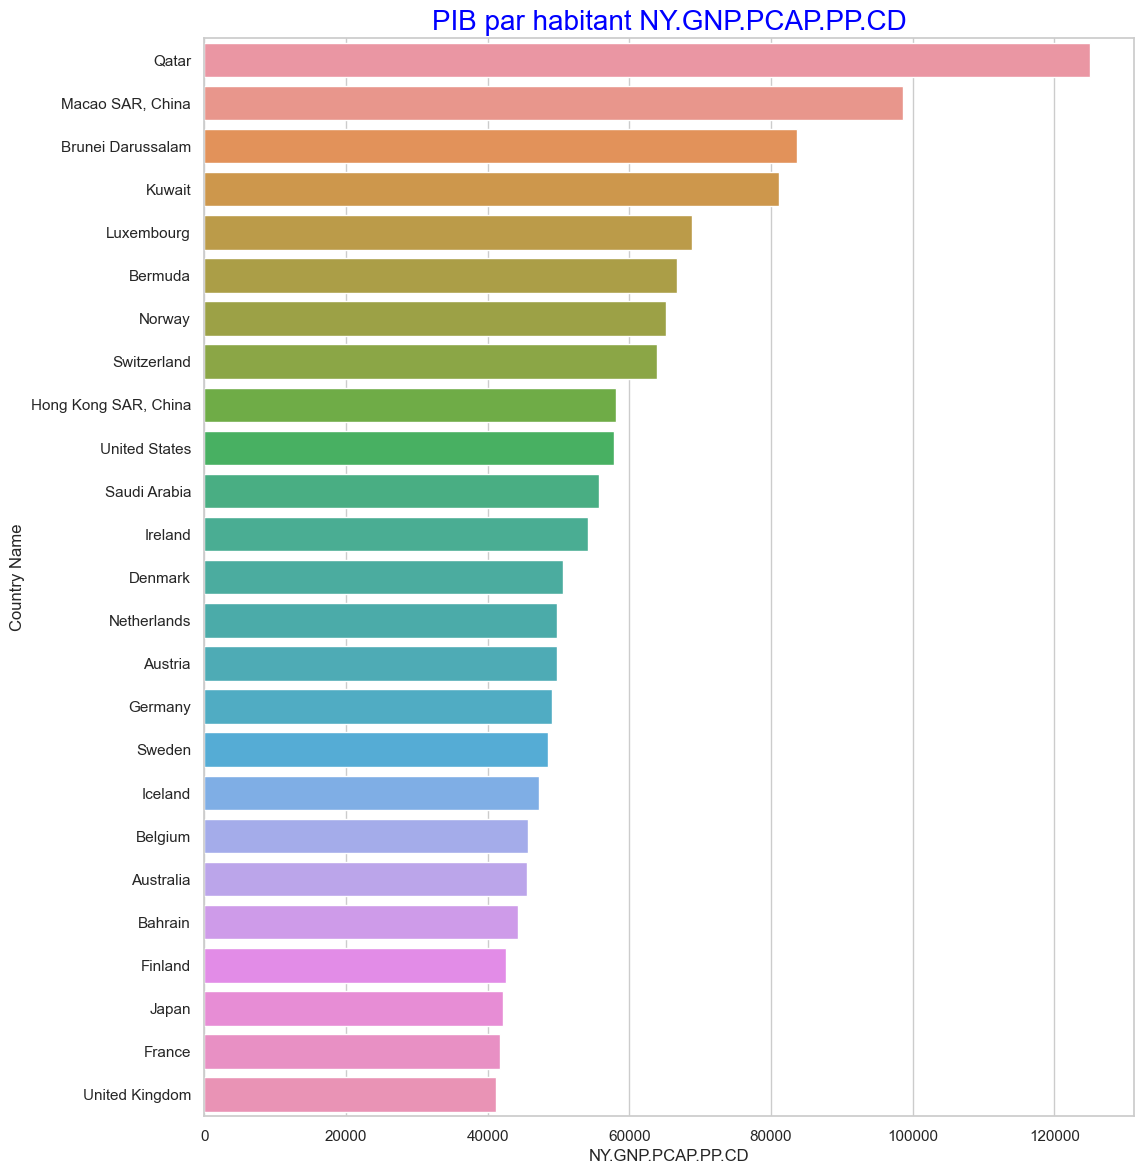

In [132]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 14))
plt.title('PIB par habitant NY.GNP.PCAP.PP.CD',color='blue', size=20)
plot = sns.barplot(y = PIB_Habitant.iloc[:25]['Country Name'], 
                   x = PIB_Habitant.iloc[:25]['NY.GNP.PCAP.PP.CD'])
plt.show()

# 
 - **Le PIB par habitant est un indicateur économique qui mesure la richesse moyenne d’un pays**

## 7.3 TOP 10 meilleurs pays selon chaque indicateur 

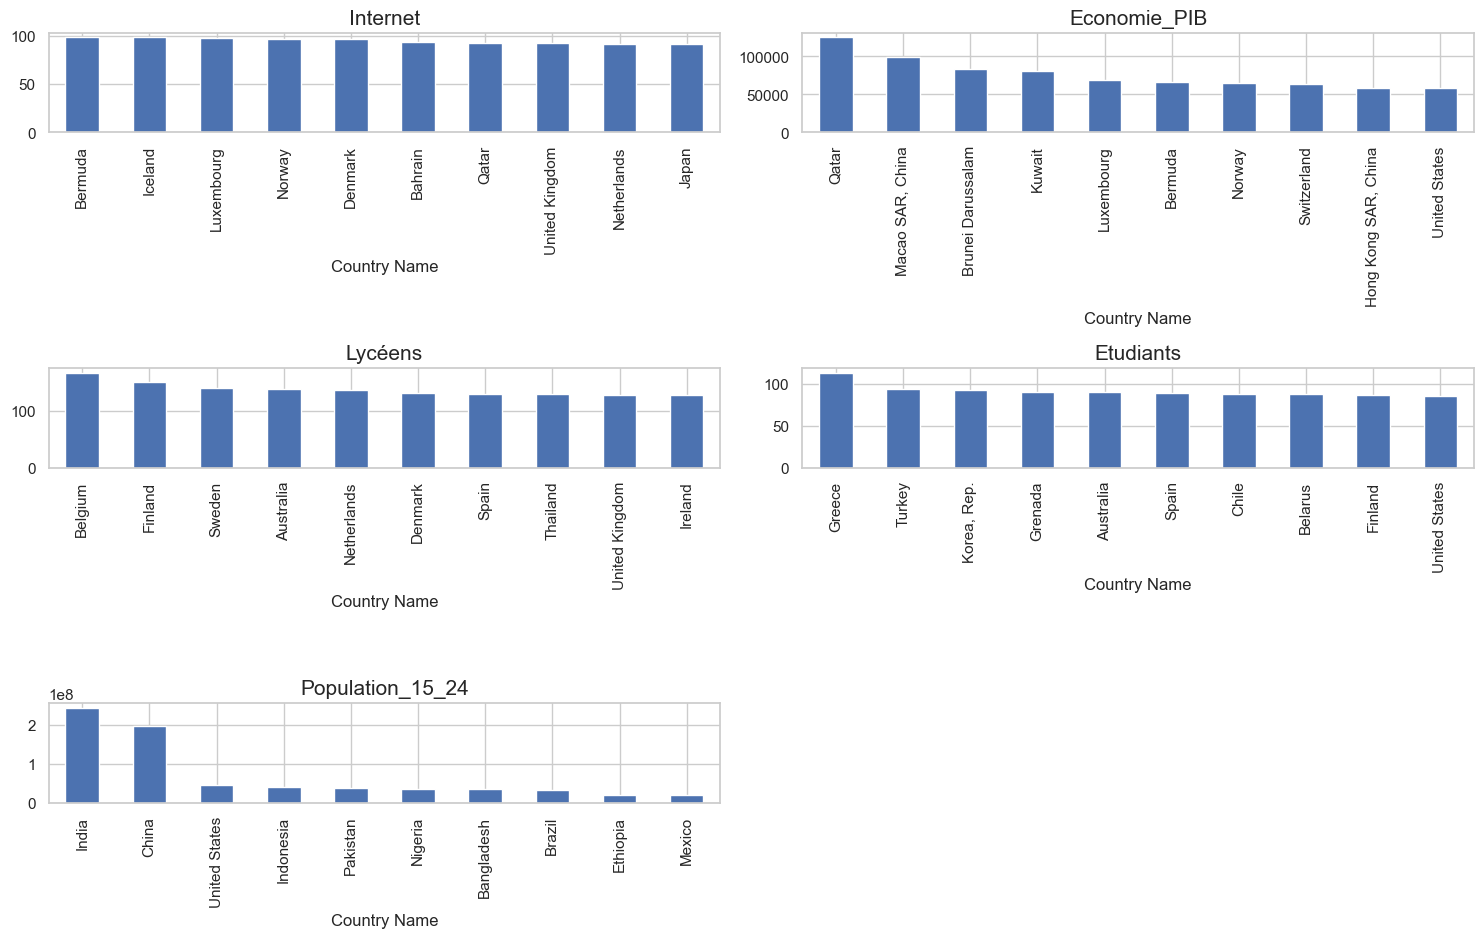

In [133]:
# TOP 10 meilleurs pays selon chaque indicateur 
plt.figure(figsize=(15, 15))
i=1
for k in liste_code_indicateurs_finale:
    plt.subplot(5, 2,i )
    df_data[k].sort_values(ascending=False)[:10].plot.bar()
    plt.title(liste_nom_indicateurs_finale[liste_code_indicateurs_finale.index(k)],fontsize=15)
    i+=1
    
plt.tight_layout()

## **Partie 8** :  Analyse statistiques

## 8.1 Histogramme & Boite à moustache de chaque indicateur


## 8.1.1 Indicateur IT.NET.USER.P2 "Internet"

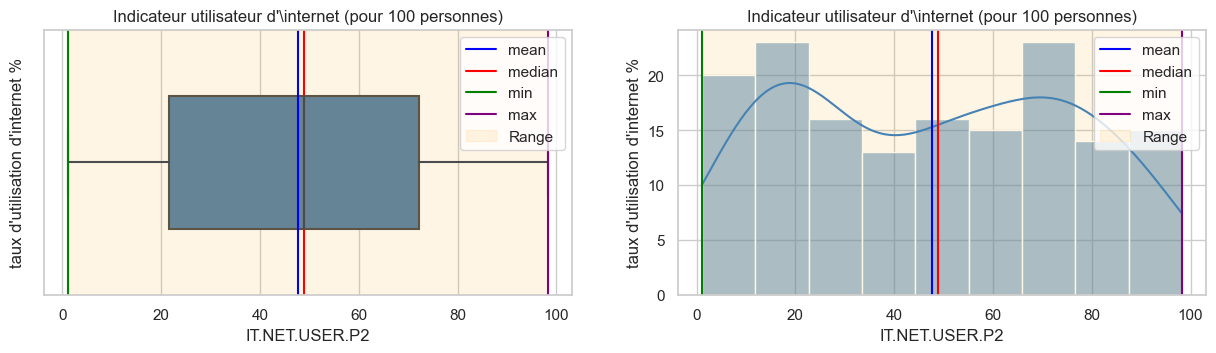

In [134]:
#----------------------------------------#
#      IT.NET.USER.P2   Internet         #
#----------------------------------------#
plt.figure(figsize=(15,20))
plt.subplot(5,2,5)
mean=df_data['IT.NET.USER.P2'].mean()
median=df_data['IT.NET.USER.P2'].median()
Min=df_data['IT.NET.USER.P2'].min()
Max=df_data['IT.NET.USER.P2'].max()
sns.boxplot(x=df_data['IT.NET.USER.P2'],width=0.5,color='SteelBlue')
plt.title("Indicateur utilisateur d'\internet (pour 100 personnes)")
plt.ylabel('taux d\'utilisation d\'internet %')
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')

plt.subplot(5,2,6)
sns.histplot(x=df_data['IT.NET.USER.P2'],kde=True,color='SteelBlue')
plt.title("Indicateur utilisateur d'\internet (pour 100 personnes)")
plt.ylabel('taux d\'utilisation d\'internet %')
plt.savefig("Indicateur utilisateur d'internet (pour 100 personnes)")
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')


In [135]:
# Mesure d'asymétrie
print("Mesure d'asymétrie :")
df_data['IT.NET.USER.P2'].skew()

Mesure d'asymétrie :


0.05476582584510932

In [136]:
# Mesure d'applatissement
print("Mesure d'applatissement : ")
df_data['IT.NET.USER.P2'].kurtosis()

Mesure d'applatissement : 


-1.2896942590240426

- **La distribution présente une forme bimodale avec deux pics à 20% à 70% ,visiblement il ya pas des outliers** 
- **La distribution de l'indicateur Internet présente une mesure d'asymétrie positive et une mesure d'aplatissement négative**

## 8.1.2 Indicateur  NY.GNP.PCAP.PP.CD "Economie PIB"

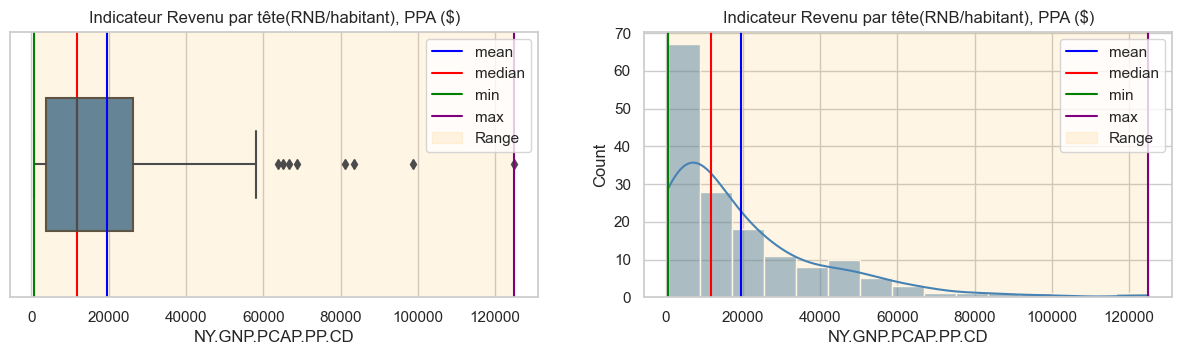

In [137]:

#---------------------------------------------------#
#      NY.GNP.PCAP.PP.CD : Revenu par Habitant  ($) #
#---------------------------------------------------#

plt.figure(figsize=(15,20))
plt.subplot(5,2,5)
mean=df_data['NY.GNP.PCAP.PP.CD'].mean()
median=df_data['NY.GNP.PCAP.PP.CD'].median()
Min=df_data['NY.GNP.PCAP.PP.CD'].min()
Max=df_data['NY.GNP.PCAP.PP.CD'].max()
sns.boxplot(x=df_data['NY.GNP.PCAP.PP.CD'],width=0.5,color='SteelBlue')
plt.title("Indicateur Revenu par tête(RNB/habitant), PPA ($)")
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')


plt.subplot(5,2,6)
mean=df_data['NY.GNP.PCAP.PP.CD'].mean()
median=df_data['NY.GNP.PCAP.PP.CD'].median()
sns.histplot(x=df_data['NY.GNP.PCAP.PP.CD'],kde=True,color='SteelBlue')
plt.title("Indicateur Revenu par tête(RNB/habitant), PPA ($)")
plt.savefig("Indicateur utilisateur d'internet (pour 100 personnes)")
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')

In [138]:
# Mesure d'asymétrie
print(" Mesure d'asymétrie :")
df_data['NY.GNP.PCAP.PP.CD'].skew()

 Mesure d'asymétrie :


1.9247338141482369

In [139]:
# Mesure d'applatissement
print(" Mesure d'applatissement :")
df_data['NY.GNP.PCAP.PP.CD'].kurtosis()

 Mesure d'applatissement :


4.7336751906722885

- **La distribution de l'indicateur Economie_PIB présente une mesure d'asymétrie positive étalée à droite et une mesure d'aplatissement positive**

- **Présence de plusieurs valeurs aberrantes**

# Les valeur aberrantes de l'indicateur "NY.GNP.PCAP.PP.CD" Economie PIB 

In [140]:
#Detection les valeurs aberrantes en utilisants la methode interquartille 
upper_lim_PIB = df_data["NY.GNP.PCAP.PP.CD"].quantile(.95)
upper_lim_PIB

59869.9999999999

In [141]:
df_data_ouliers_PIB = df_data [df_data['NY.GNP.PCAP.PP.CD'] >upper_lim_PIB ]
df_data_ouliers_PIB.sort_values('NY.GNP.PCAP.PP.CD', ascending=False, inplace=True)
df_data_ouliers_PIB['NY.GNP.PCAP.PP.CD']

Country Name
Qatar                125000.0
Macao SAR, China      98650.0
Brunei Darussalam     83600.0
Kuwait                81150.0
Luxembourg            68780.0
Bermuda               66670.0
Norway                65180.0
Switzerland           63930.0
Name: NY.GNP.PCAP.PP.CD, dtype: object

In [142]:
#Detection les valeurs aberrantes en utilisants  Z-score
outliers_PIB=[]

def detect_outliers(data):
   threshold = 3
   mean=np.mean(data)
   std=np.std(data)
   
   for i in data :
      z_score =(i-mean)/std
      if np.abs(z_score)>threshold :
        outliers_PIB.append(i)
   return outliers_PIB

In [143]:
detect_outliers(df_data['NY.GNP.PCAP.PP.CD'])

[83600.0, 98650.0, 125000.0]

## 8.1.3 Indicateur SE.SEC.ENRR "Lycéens"

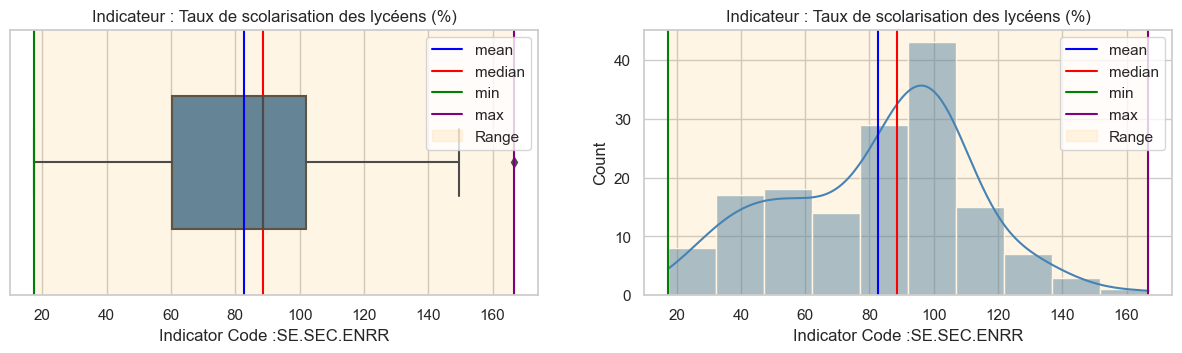

In [144]:
#------------------------------------#
#      SE.SEC.ENRR    : Lycéens      #
#------------------------------------#
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.boxplot(x=df_data['SE.SEC.ENRR'],width=0.5,color='SteelBlue')
mean=df_data['SE.SEC.ENRR'].mean()
median=df_data['SE.SEC.ENRR'].median()
Min=df_data['SE.SEC.ENRR'].min()
Max=df_data['SE.SEC.ENRR'].max()
plt.xlabel('Indicator Code :SE.SEC.ENRR')
plt.title('Indicateur : Taux de scolarisation des lycéens (%)')
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')
plt.subplot(5,2,2)
sns.histplot(x=df_data['SE.SEC.ENRR'],kde=True,color='SteelBlue')
plt.xlabel('Indicator Code :SE.SEC.ENRR')
plt.title('Indicateur : Taux de scolarisation des lycéens (%)')
mean=df_data['SE.SEC.ENRR'].mean()
median=df_data['SE.SEC.ENRR'].median()
Min=df_data['SE.SEC.ENRR'].min()
Max=df_data['SE.SEC.ENRR'].max()
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')


In [145]:
# Mesure d'asymétrie
print(" Mesure d'asymétrie =")
df_data['SE.SEC.ENRR'].skew()

 Mesure d'asymétrie =


-0.18712728249326832

In [146]:
# Mesure d'applatissement
print("Mesure d'applatissement =")
df_data['SE.SEC.ENRR'].kurtosis()

Mesure d'applatissement =


-0.3264376401489386

- **La distribution de Taux de scolarisation des lycées présente une mesure d'asymétrie négative et une mesure d'aplatissement négative**


## 8.8.4 Indicateur SE.TER.ENRR "Etudiants"

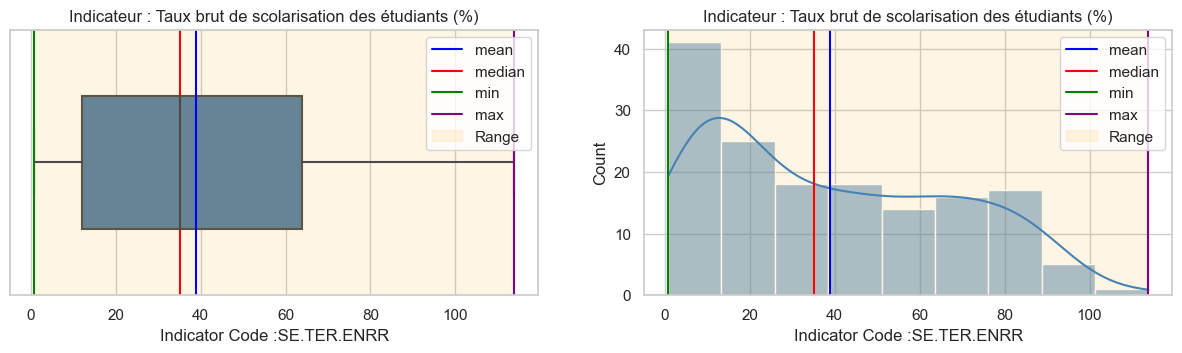

In [147]:
#------------------------------------#
#      SE.TER.ENRR    :   Etudiants  #
#------------------------------------#
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.boxplot(x=df_data['SE.TER.ENRR'],width=0.5,color='SteelBlue')
mean=df_data['SE.TER.ENRR'].mean()
median=df_data['SE.TER.ENRR'].median()
Min=df_data['SE.TER.ENRR'].min()
Max=df_data['SE.TER.ENRR'].max()
plt.xlabel('Indicator Code :SE.TER.ENRR')
plt.title('Indicateur : Taux brut de scolarisation des étudiants (%)')
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')
plt.subplot(5,2,2)
sns.histplot(x=df_data['SE.TER.ENRR'],kde=True,color='SteelBlue')
plt.xlabel('Indicator Code :SE.TER.ENRR')
plt.title('Indicateur : Taux brut de scolarisation des étudiants (%)')
mean=df_data['SE.TER.ENRR'].mean()
median=df_data['SE.TER.ENRR'].median()
Min=df_data['SE.TER.ENRR'].min()
Max=df_data['SE.TER.ENRR'].max()
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')

In [148]:
# Mesure d'asymétrie 
print(" Mesure d'asymétrie =")
df_data['SE.TER.ENRR'].skew()

 Mesure d'asymétrie =


0.4421801597121982

In [149]:
# Mesure d'applatissement
print("Mesure d'applatissement =")
df_data['SE.TER.ENRR'].kurtosis()

Mesure d'applatissement =


-1.0645522772656064

- **La distribution du taux brut de scolarisation des étudiants présente une mesure d'asymétrie positive et une mesure d'aplatissement négative**

## 8.1.5 Indicateur : SP.POP.1524.TO.UN "Population 15-24 ans "

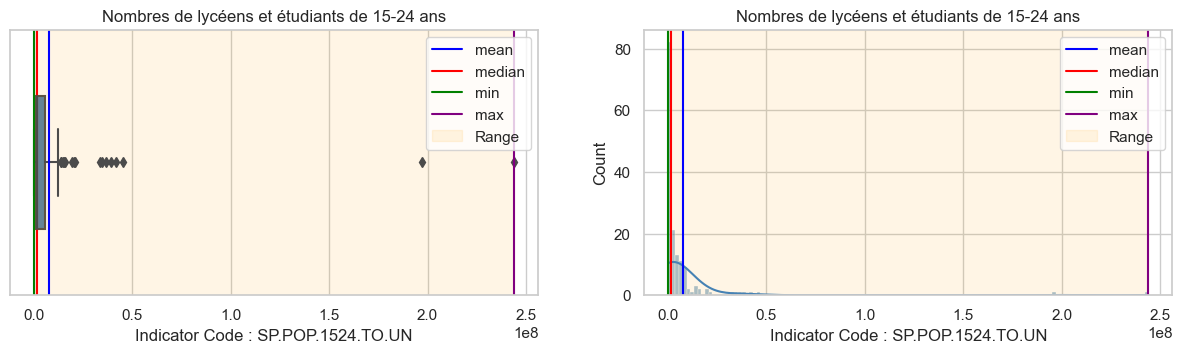

In [150]:
#---------------------------------------------------------------------#
#      SP.POP.1524.TO.UN  Tranche d'âge de la population 15-24 ans    #
#---------------------------------------------------------------------#
plt.figure(figsize=(15,20))
plt.subplot(5,2,7)
mean=df_data['SP.POP.1524.TO.UN'].mean()
median=df_data['SP.POP.1524.TO.UN'].median()
Min=df_data['SP.POP.1524.TO.UN'].min()
Max=df_data['SP.POP.1524.TO.UN'].max()
sns.boxplot(x=df_data['SP.POP.1524.TO.UN'],width=0.5,color='SteelBlue')
plt.xlabel('Indicator Code : SP.POP.1524.TO.UN')
plt.title('Nombres de lycéens et étudiants de 15-24 ans')
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.legend(loc='upper right')
plt.subplot(5,2,8)
sns.histplot(x=df_data['SP.POP.1524.TO.UN'],kde=True,color='SteelBlue')
plt.xlabel('Indicator Code : SP.POP.1524.TO.UN')
mean=df_data['SP.POP.1524.TO.UN'].mean()
median=df_data['SP.POP.1524.TO.UN'].median()
plt.axvline(mean,color='blue',label='mean')
plt.axvline(median,color='red',label='median')
plt.axvline(Min,color='green',label='min')
plt.axvline(Max,color='purple',label='max')
plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
plt.title('Nombres de lycéens et étudiants de 15-24 ans')
plt.savefig("pie_char_statistique")
plt.legend(loc='upper right')

In [151]:
# Mesure d'asymétrie 
print(" Mesure d'asymétrie =")
df_data['SP.POP.1524.TO.UN'].skew()

 Mesure d'asymétrie =


7.688666661572045

In [152]:
# Mesure d'applatissement
print("Mesure d'applatissement =")
df_data['SP.POP.1524.TO.UN'].kurtosis()

Mesure d'applatissement =


63.79380197894866

- **La distribution du nombre total de la population entre 15-24 ans présente une mesure d'asymétrie positive et une mesure d'aplatissement positive. On peux en déduire un fort écart entre les pays pour cet indicateur.**
- **Présence de plusieurs valeurs aberrantes**


# Les valeur aberrantes de l'indicateur "SP.POP.1524.TO.UN" Population 15-24 ans

In [153]:
#Detection les valeurs aberrantes en utilisants la methode interquartille 
upper_lim_Pop = df_data["SP.POP.1524.TO.UN"].quantile(.95)
upper_lim_Pop

24830633.199999787

In [154]:
df_data_ouliers_Pop = df_data [df_data['SP.POP.1524.TO.UN'] >upper_lim_Pop ]
df_data_ouliers_Pop.sort_values('SP.POP.1524.TO.UN', ascending=False, inplace=True)
df_data_ouliers_Pop['SP.POP.1524.TO.UN']

Country Name
India            244120201.0
China            197026759.0
United States     45147517.0
Indonesia         41819264.0
Pakistan          39080811.0
Nigeria           36659023.0
Bangladesh        34400594.0
Brazil            33595574.0
Name: SP.POP.1524.TO.UN, dtype: object

In [155]:
#Detection les valeurs aberrantes en utilisants  Z-score
outliers_Pop=[]

def detect_outliers(data):
   threshold = 3
   mean=np.mean(data)
   std=np.std(data)
   
   for i in data :
      z_score =(i-mean)/std
      if np.abs(z_score)>threshold :
        outliers_Pop.append(i)
   return outliers_Pop

In [156]:
detect_outliers(df_data['SP.POP.1524.TO.UN'])

[197026759.0, 244120201.0]

## 8.2 Calcul des ordres de grandeur de chaque indicateur 

In [157]:
df_data.columns.tolist()

['IT.NET.USER.P2',
 'NY.GNP.PCAP.PP.CD',
 'SE.SEC.ENRR',
 'SE.TER.ENRR',
 'SP.POP.1524.TO.UN']

In [158]:
#Calcul des ordres de grandeur de chaque indicateur 
Ordre_mean=['moyenne']
Ordre_median=['médiane']
Ordre_ecart=['écart type']
Ordre_Max=['Max']
Ordre_Min=['Min']

ListOtdreGrandeur = df_data.columns.tolist()

for i in ListOtdreGrandeur :
    mean=round(df_data[str(i)].mean(),2)
    median=round(df_data[str(i)].median(),2)
    std=round(df_data[str(i)].std(),2)
    Max=round(df_data[str(i)].max(),2)
    Min=round(df_data[str(i)].min(),2)
    
    Ordre_mean.append(mean)
    Ordre_median.append(median)
    Ordre_ecart.append(std)
    Ordre_Max.append(Max)
    Ordre_Min.append(Min)
       
OrdreGrandeur_descriptives=[Ordre_mean,Ordre_median,Ordre_ecart,Ordre_Max,Ordre_Min]
df_Ordre_descriptives = pd.DataFrame(OrdreGrandeur_descriptives,columns=['Mesure','Internet', 'Economie_PIB'  ,'Lycéens' , 'Etudiants','Population_15_24'])
df_Ordre_descriptives

,Mesure,Internet,Economie_PIB,Lycéens,Etudiants,Population_15_24
0,moyenne,47.60,19531.42,82.75,38.85,7.449137e+06
1,médiane,48.88,11900.00,88.67,35.08,1.493722e+06
2,écart type,28.57,21191.63,29.38,28.74,2.587063e+07
3,Max,98.32,125000.00,166.81,113.87,2.441202e+08
4,Min,1.08,670.00,17.38,0.80,7.102000e+03


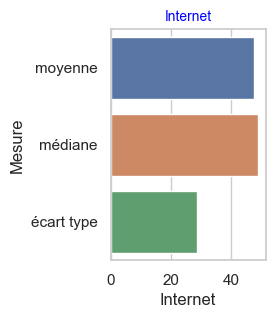

In [159]:
#Internet 
sns.set(style="whitegrid")
plt.figure(figsize=(2,3))
plt.title('Internet',color='blue', size=10)
plot = sns.barplot(y = df_Ordre_descriptives.iloc[:3]['Mesure'], 
                   x = df_Ordre_descriptives.iloc[:3]['Internet'])
plt.show()

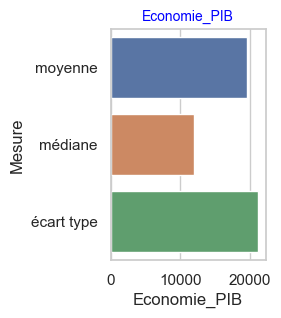

In [160]:
#Economie PIB
sns.set(style="whitegrid")
plt.figure(figsize=(2,3))
plt.title('Economie_PIB',color='blue', size=10)
plot = sns.barplot(y = df_Ordre_descriptives.iloc[:3]['Mesure'], 
                   x = df_Ordre_descriptives.iloc[:3]['Economie_PIB'])
plt.show()

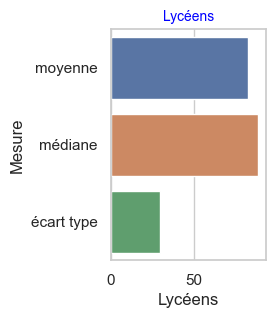

In [161]:
#Lycéens
sns.set(style="whitegrid")
plt.figure(figsize=(2,3))
plt.title('Lycéens',color='blue', size=10)
plot = sns.barplot(y = df_Ordre_descriptives.iloc[:3]['Mesure'], 
                   x = df_Ordre_descriptives.iloc[:3]['Lycéens'])
plt.show()

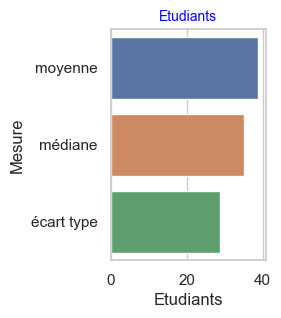

In [162]:
#Etudiants
sns.set(style="whitegrid")
plt.figure(figsize=(2,3))
plt.title('Etudiants',color='blue', size=10)
plot = sns.barplot(y = df_Ordre_descriptives.iloc[:3]['Mesure'], 
                   x = df_Ordre_descriptives.iloc[:3]['Etudiants'])
plt.show()


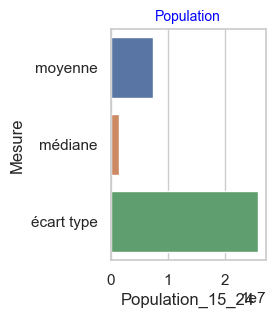

In [163]:
#Population
sns.set(style="whitegrid")
plt.figure(figsize=(2,3))
plt.title('Population',color='blue', size=10)
plot = sns.barplot(y = df_Ordre_descriptives.iloc[:3]['Mesure'], 
                   x = df_Ordre_descriptives.iloc[:3]['Population_15_24'])
plt.show()


In [164]:
df_Ordre_descriptives.iloc[0,5]

7449136.98

- La moyenne est la valeur correspondant au centre de gravité de l'ensemble des valeurs d'une variable.
- La médiane est la valeur centrale qui partage l’échantillon en 2 groupes de même effectif: 50 % au-dessus et 50 % en dessous.
- La variance est la mesure de la dispersion des échantillons autour de la moyenne.
- L'écart-type sert à mesurer la dispersion, ou l'étalement, d'un ensemble de valeurs autour de leur moyenne.

In [165]:
df_data.shape

(155, 5)

## 8.3 Les pays dont la population est supérieure à la moyenne

In [166]:
# Ne garder que les pays dont la population est supérieure à la moyenne

df_data=df_data[df_data['SP.POP.1524.TO.UN']>df_Ordre_descriptives.iloc[0,5]]

In [167]:
print("Nombre de pays dont la la population est supérieure à la moyenne : ")
df_data.shape[0]

Nombre de pays dont la la population est supérieure à la moyenne : 


28

In [168]:
df_data

Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Bangladesh,14.4,3560.0,63.524529,13.4408,34400594.0
Brazil,58.327952,15310.0,99.65097,50.604919,33595574.0
China,50.3,14420.0,94.29921,43.391769,197026759.0
Colombia,55.904973,13590.0,98.091858,55.657269,8999338.0
"Congo, Dem. Rep.",3.8,740.0,43.505211,6.64076,15535095.0
"Egypt, Arab Rep.",37.819383,10590.0,86.102318,36.228539,15377746.0
Ethiopia,11.6,1630.0,35.173248,8.12604,21074230.0
France,84.6945,41800.0,110.644012,64.390472,7567872.0
Germany,87.5898,49060.0,102.665398,68.265587,8682394.0


#  28 pays restants

## 8.4  Normalisation Min-Max des données 

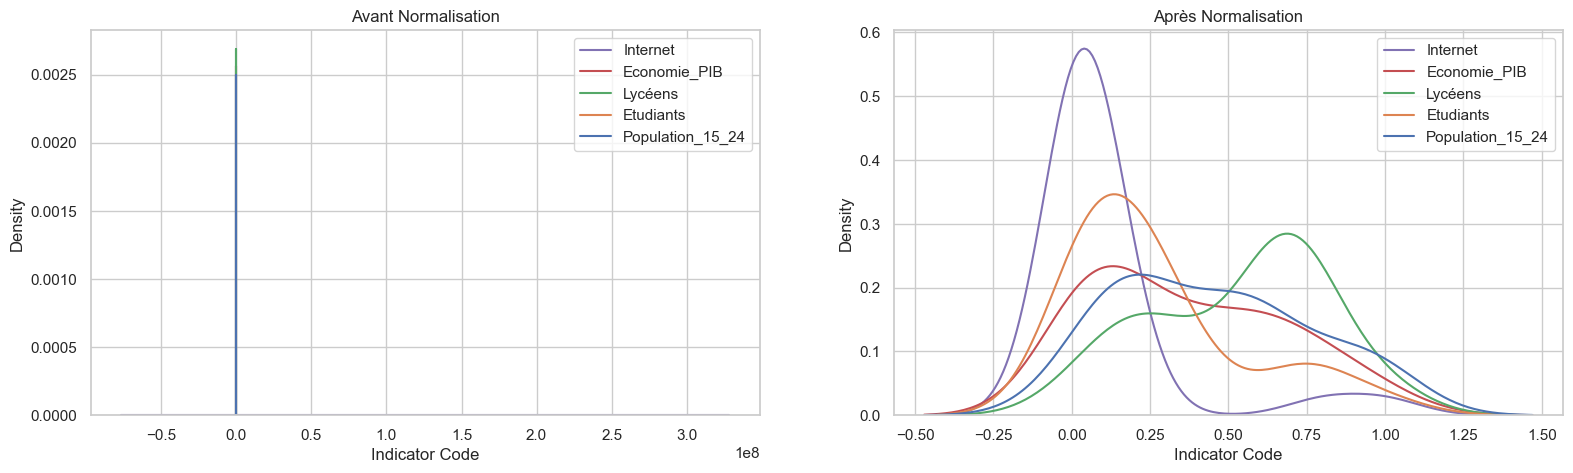

In [169]:
### Normalisation des données   
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler


scaler1 = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler1.fit_transform(df_data)

minmax_scaled_df = pd.DataFrame(minmax_scaled_df, 
                                columns=liste_code_indicateurs_finale,
                                index =df_data.index.to_list())

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(19, 5))

ax1.set_title('Avant Normalisation')
sns.kdeplot(df_data[['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']], ax=ax1)
ax1.set_xlabel('Indicator Code')
ax1.legend(loc='upper right', labels=liste_nom_indicateurs_finale)

ax2.set_title('Après Normalisation')
sns.kdeplot(minmax_scaled_df[['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']], ax=ax2)
ax2.set_xlabel('Indicator Code')
ax2.legend( loc='upper right', labels=liste_nom_indicateurs_finale)





<Axes: >

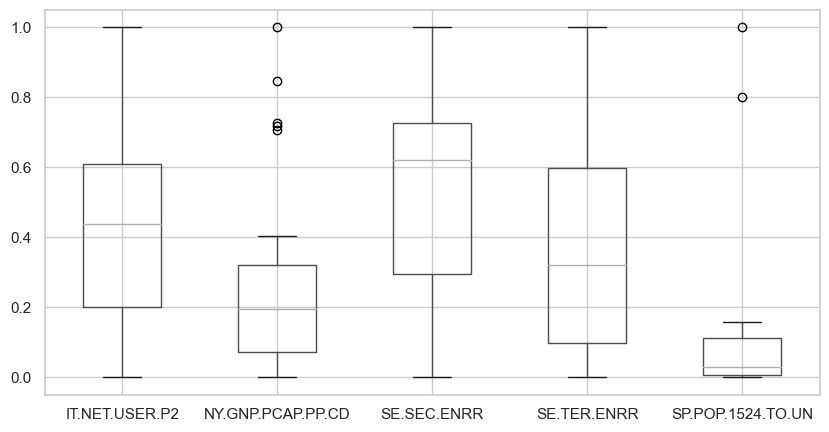

In [170]:
plt.figure(figsize=(10,5))
minmax_scaled_df[['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']].boxplot()

In [171]:
df_data=minmax_scaled_df.copy()
df_data.head()

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Bangladesh,0.120181,0.049335,0.380919,0.107520,0.113432
Brazil,0.618229,0.254899,0.722491,0.515536,0.110029
China,0.527209,0.239328,0.671891,0.436345,0.800917
Colombia,0.590757,0.224808,0.707750,0.571005,0.006051
"Congo, Dem. Rep.",0.000000,0.000000,0.191638,0.032864,0.033681


## **Partie 9 :** Définition d'un score 

## 9.1 Stratégie N° 01 :pondération quasi-similaire à tous les indicateurs

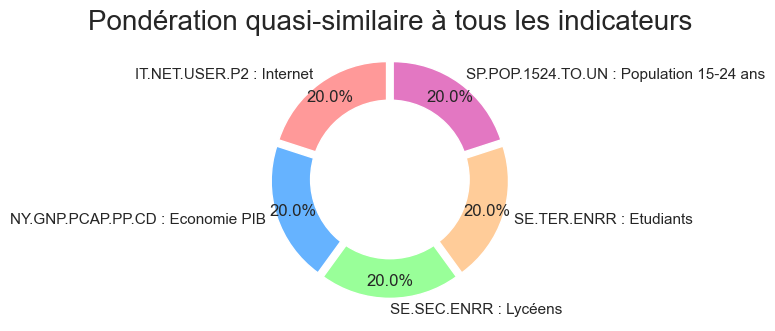

In [172]:
df_dataSC2=df_data.copy()
#Pondération  :
#  IT.NET.USER.P2"Internet"-------------->1
#  NY.GNP.PCAP.PP.CD "Economie"---------->1
#  SE.SEC.ENRR "Lycéens"----------------->1
#  SE.TER.ENRR "Etudiants"--------------->1
#  SP.POP.1524.TO.UN Population---------->1

CoefStra1=[1,1,1,1,1]

labels = ["IT.NET.USER.P2 : Internet",
          "NY.GNP.PCAP.PP.CD : Economie PIB",
          "SE.SEC.ENRR : Lycéens",
          "SE.TER.ENRR : Etudiants",
          "SP.POP.1524.TO.UN : Population 15-24 ans"]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e377c2']
explode = (0.05,0.05,0.05,0.05,0.05)
 
plt.pie(CoefStra1, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.title('Pondération quasi-similaire à tous les indicateurs', fontsize = 20)
plt.tight_layout()
plt.show()

In [173]:
#La formule score :

df_data['Score']=(CoefStra1[0]*df_data.iloc[:,0]+
                  CoefStra1[1]*df_data.iloc[:,1]+
                  CoefStra1[2]*df_data.iloc[:,2]+
                  CoefStra1[3]*df_data.iloc[:,3]+
                  CoefStra1[4]*df_data.iloc[:,4])/5

## 9.1.1 Top 10 des meilleurs pays

In [174]:
df_data.sort_values(by = "Score",ascending=False).head(10)

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Score
United States,0.802199,1.000000,0.702766,0.901888,0.158864,0.713143
United Kingdom,1.000000,0.707663,0.988745,0.580002,0.000692,0.655420
Germany,0.949995,0.845346,0.750993,0.709428,0.004712,0.652095
Japan,0.989317,0.725857,0.742296,0.655600,0.019402,0.626494
France,0.917168,0.718334,0.826430,0.666884,0.000000,0.625763
Russian Federation,0.789226,0.390483,0.768179,0.842584,0.029990,0.564092
Turkey,0.566268,0.403429,0.749323,1.000000,0.026896,0.549183
China,0.527209,0.239328,0.671891,0.436345,0.800917,0.535138
Brazil,0.618229,0.254899,0.722491,0.515536,0.110029,0.444237
"Iran, Islamic Rep.",0.470916,0.295836,0.623369,0.749123,0.025317,0.432912


In [175]:
# Les  i meilleurs pays avec un fort potentiel de clients pour nos services selon le score défini
# saisir une valeur de i
i=10 
meilleurs_clients=df_data['Score'].sort_values(ascending=False)[:i].index.tolist()
meilleurs_clients

['United States',
 'United Kingdom',
 'Germany',
 'Japan',
 'France',
 'Russian Federation',
 'Turkey',
 'China',
 'Brazil',
 'Iran, Islamic Rep.']

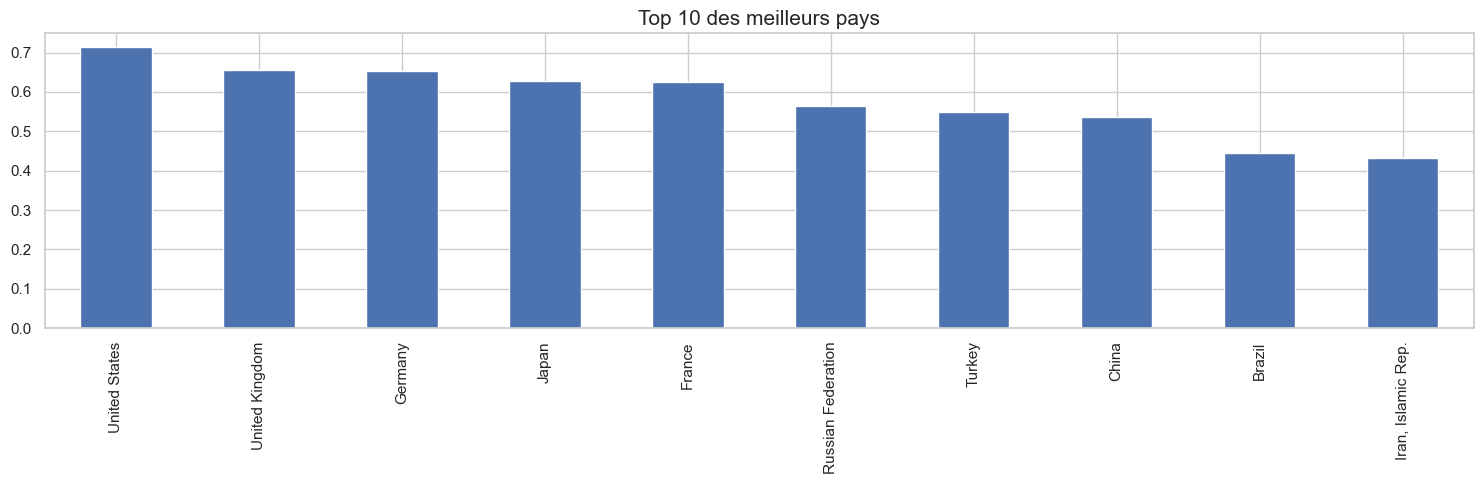

In [176]:
# Graphe représentant les i meilleurs pays selon le score défini
# saiasir une valeur de i
i=10 
plt.figure(figsize=(15, 5))
df_data['Score'].sort_values(ascending=False)[:i].plot.bar()
plt.title('Top 10 des meilleurs pays',fontsize=15)
plt.tight_layout()

In [177]:

df_data.reset_index(level=0, inplace=True)
df_data.rename(columns = {'index':'Country Name'}, inplace = True)


In [178]:

df_data=pd.merge(df_data,EdStatsData[['Country Code','Country Name']].drop_duplicates(),on='Country Name',how='left')
df_data=pd.merge(df_data,EdStatsCountry[['Country Code','Region']].drop_duplicates(),on='Country Code', how='left')
#affichage du score par ordre decroissant
dv =df_data.sort_values('Score', ascending=False, inplace=True)


In [179]:
df_region_stra1=pd.DataFrame(df_data[['Country Name','Region','Score']])
df_region_stra1.reset_index().head(10)

,index,Country Name,Region,Score
0,27,United States,North America,0.713143
1,26,United Kingdom,Europe & Central Asia,0.655420
2,8,Germany,Europe & Central Asia,0.652095
3,12,Japan,East Asia & Pacific,0.626494
4,7,France,Europe & Central Asia,0.625763
5,19,Russian Federation,Europe & Central Asia,0.564092
6,24,Turkey,Europe & Central Asia,0.549183
7,2,China,East Asia & Pacific,0.535138
8,1,Brazil,Latin America & Caribbean,0.444237
9,11,"Iran, Islamic Rep.",Middle East & North Africa,0.432912


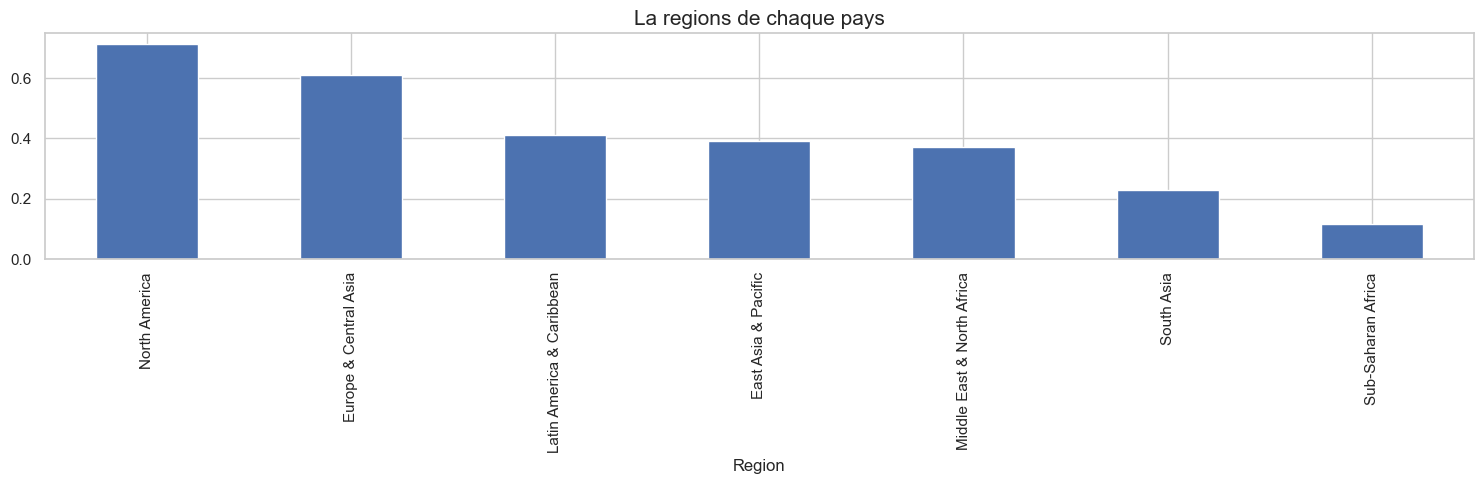

In [180]:

df_region_stra2=pd.DataFrame(df_data[['Score','Region']])
score_region=df_region_stra2.groupby('Region')['Score'].mean()
plt.figure(figsize=(15, 5))
score_region.sort_values(ascending=False).plot.bar()
plt.title('La regions de chaque pays',fontsize=15)
plt.tight_layout()

## 9.2 Stratégie N° 02 : pondération modifiée

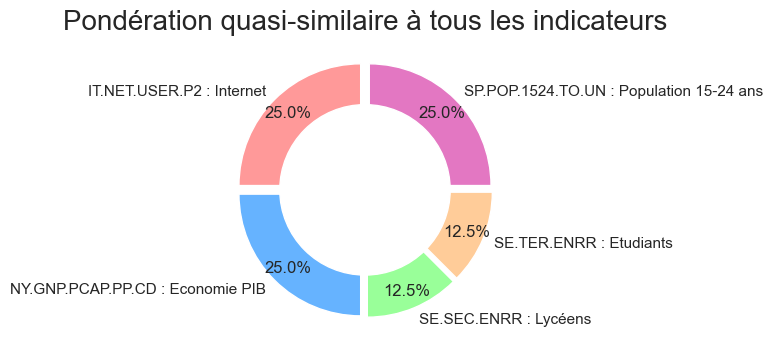

In [181]:
#Pondération  :
#  IT.NET.USER.P2"Internet"-------------->2
#  NY.GNP.PCAP.PP.CD "Economie"---------->2
#  SE.SEC.ENRR "Lycéens"----------------->1
#  SE.TER.ENRR "Etudiants"--------------->1
#  SP.POP.1524.TO.UN Population---------->2

labels = ["IT.NET.USER.P2 : Internet",
          "NY.GNP.PCAP.PP.CD : Economie PIB",
          "SE.SEC.ENRR : Lycéens",
          "SE.TER.ENRR : Etudiants",
          "SP.POP.1524.TO.UN : Population 15-24 ans"]

CoefStra2 = [2,2,1,1,2]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e377c2']
explode = (0.05,0.05,0.05,0.05,0.05)
 
plt.pie(CoefStra2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.title('Pondération quasi-similaire à tous les indicateurs', fontsize = 20)
plt.tight_layout()
plt.show()

In [182]:
df_data['Score']=( CoefStra2[0]*df_data.iloc[:,1]+
                   CoefStra2[1]*df_data.iloc[:,2]+
                   CoefStra2[2]*df_data.iloc[:,3]+
                   CoefStra2[3]*df_data.iloc[:,4]+
                   CoefStra2[4]*df_data.iloc[:,5])/(CoefStra2[0]+CoefStra2[1]+CoefStra2[2]+CoefStra2[3]+CoefStra2[4])

## 9.2.1 Top 10 des meilleurs pays

In [183]:
df_data.sort_values(by = "Score",ascending=False).head(10)

,Country Name,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Score,Country Code,Region
27,United States,0.802199,1.000000,0.702766,0.901888,0.158864,0.690848,USA,North America
8,Germany,0.949995,0.845346,0.750993,0.709428,0.004712,0.632566,DEU,Europe & Central Asia
26,United Kingdom,1.000000,0.707663,0.988745,0.580002,0.000692,0.623182,GBR,Europe & Central Asia
12,Japan,0.989317,0.725857,0.742296,0.655600,0.019402,0.608381,JPN,East Asia & Pacific
7,France,0.917168,0.718334,0.826430,0.666884,0.000000,0.595540,FRA,Europe & Central Asia
2,China,0.527209,0.239328,0.671891,0.436345,0.800917,0.530393,CHN,East Asia & Pacific
19,Russian Federation,0.789226,0.390483,0.768179,0.842584,0.029990,0.503770,RUS,Europe & Central Asia
24,Turkey,0.566268,0.403429,0.749323,1.000000,0.026896,0.467814,TUR,Europe & Central Asia
9,India,0.251700,0.093247,0.479673,0.255010,1.000000,0.428072,IND,South Asia
1,Brazil,0.618229,0.254899,0.722491,0.515536,0.110029,0.400543,BRA,Latin America & Caribbean


In [184]:
df_data= df_data.sort_values(by = "Score",ascending=False).head(10)
df_data["Country Name"]

27         United States
8                Germany
26        United Kingdom
12                 Japan
7                 France
2                  China
19    Russian Federation
24                Turkey
9                  India
1                 Brazil
Name: Country Name, dtype: object

In [185]:

df_region_stra2=pd.DataFrame(df_data[['Country Name','Region','Score']])
df_region_stra2.reset_index().head(10)

,index,Country Name,Region,Score
0,27,United States,North America,0.690848
1,8,Germany,Europe & Central Asia,0.632566
2,26,United Kingdom,Europe & Central Asia,0.623182
3,12,Japan,East Asia & Pacific,0.608381
4,7,France,Europe & Central Asia,0.595540
5,2,China,East Asia & Pacific,0.530393
6,19,Russian Federation,Europe & Central Asia,0.503770
7,24,Turkey,Europe & Central Asia,0.467814
8,9,India,South Asia,0.428072
9,1,Brazil,Latin America & Caribbean,0.400543


In [186]:
df_data.set_index("Country Name", inplace=True)

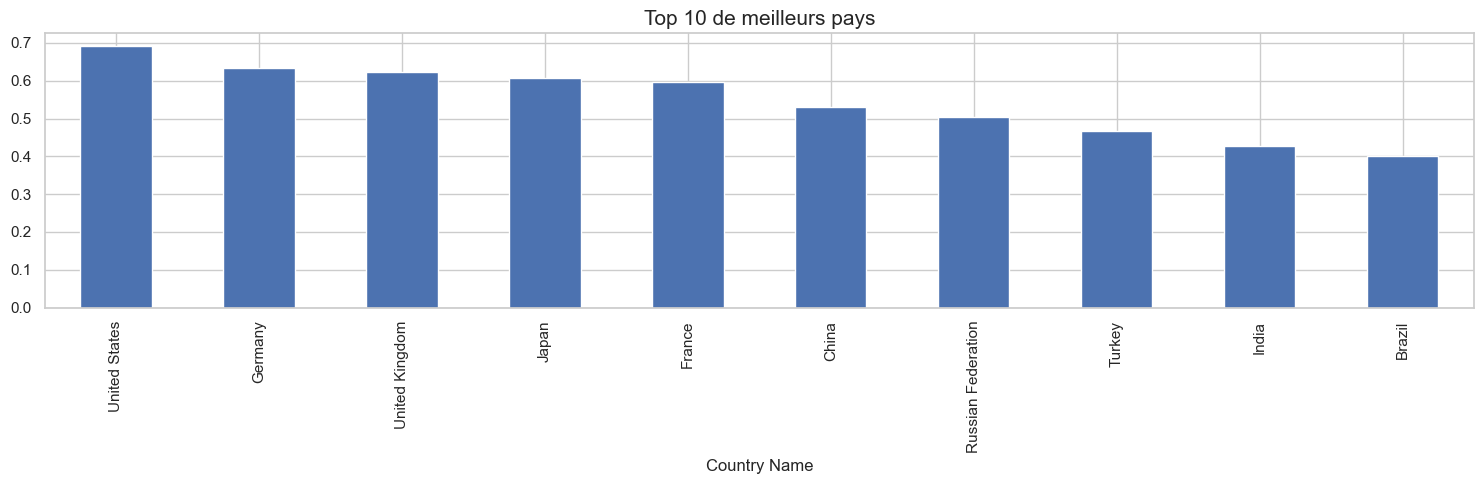

In [187]:
i=10 
plt.figure(figsize=(15, 5))
df_data['Score'].sort_values(ascending=False).plot.bar()
plt.title('Top 10 de meilleurs pays',fontsize=15)
plt.tight_layout()

In [188]:
df_data.set_index("Region", inplace=True) 

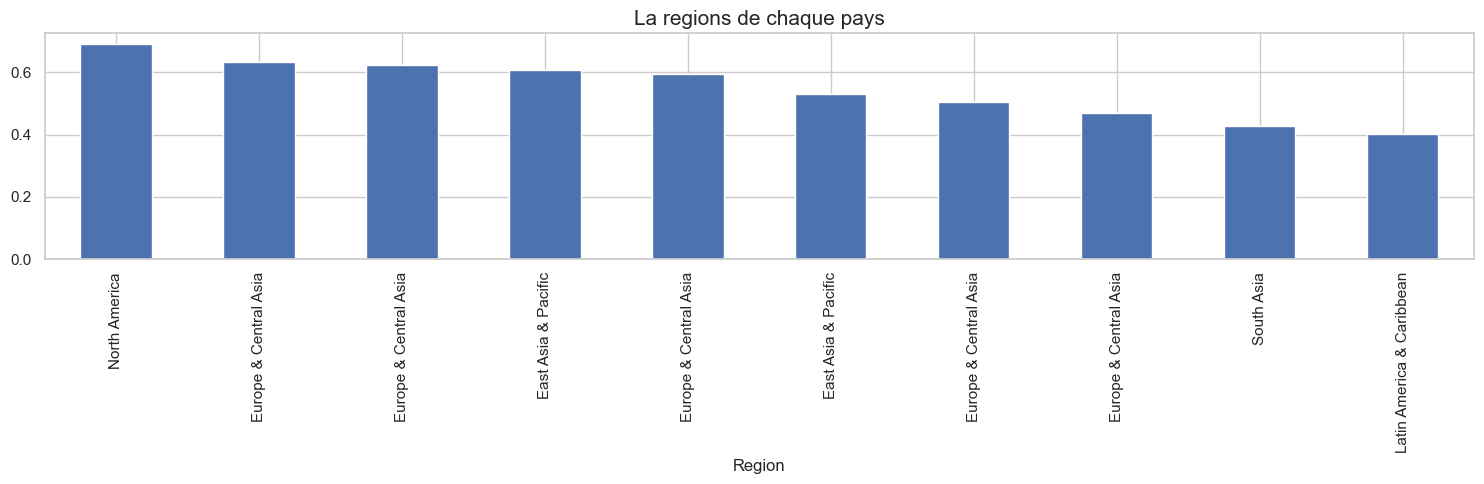

In [189]:
i=10
plt.figure(figsize=(15, 5))
df_data['Score'].sort_values(ascending=False)[:i].plot.bar()
plt.title('La regions de chaque pays',fontsize=15)
plt.tight_layout()

## **Partie 10 :** Evolution du potentiel de clients

-------------------------------------------------------Internet---------------------------------------------------------------------------------------


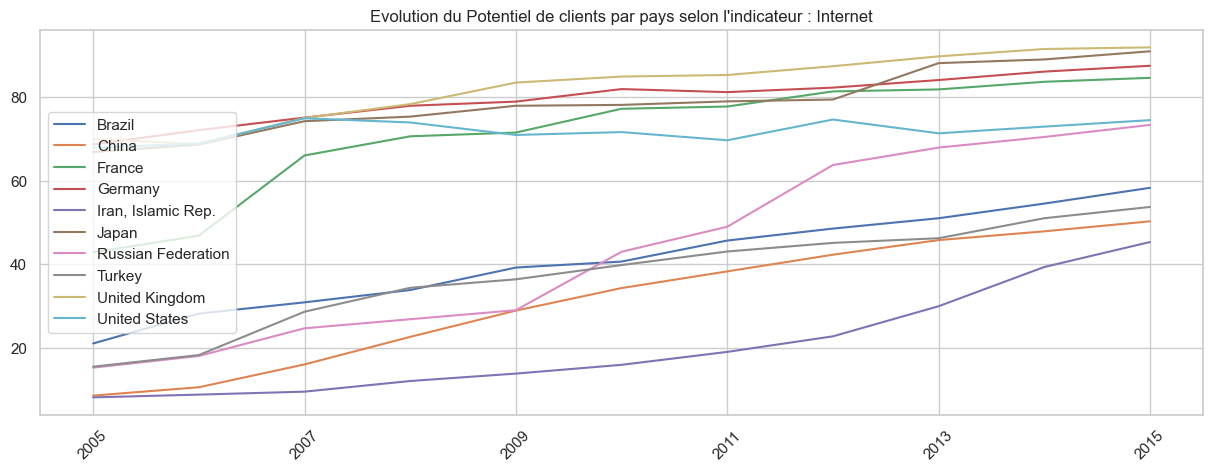

-------------------------------------------------------Economie_PIB---------------------------------------------------------------------------------------


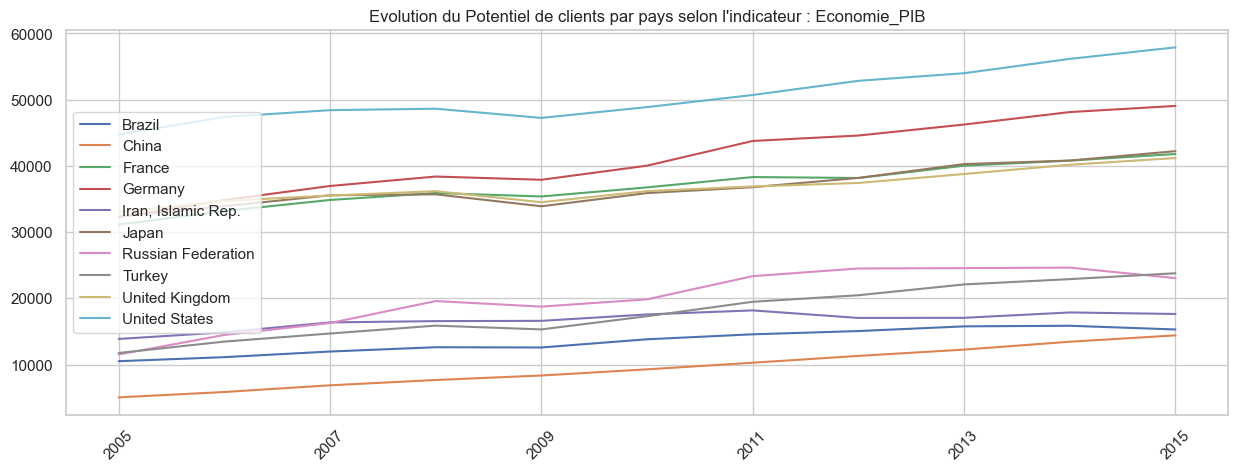

-------------------------------------------------------Lycéens---------------------------------------------------------------------------------------


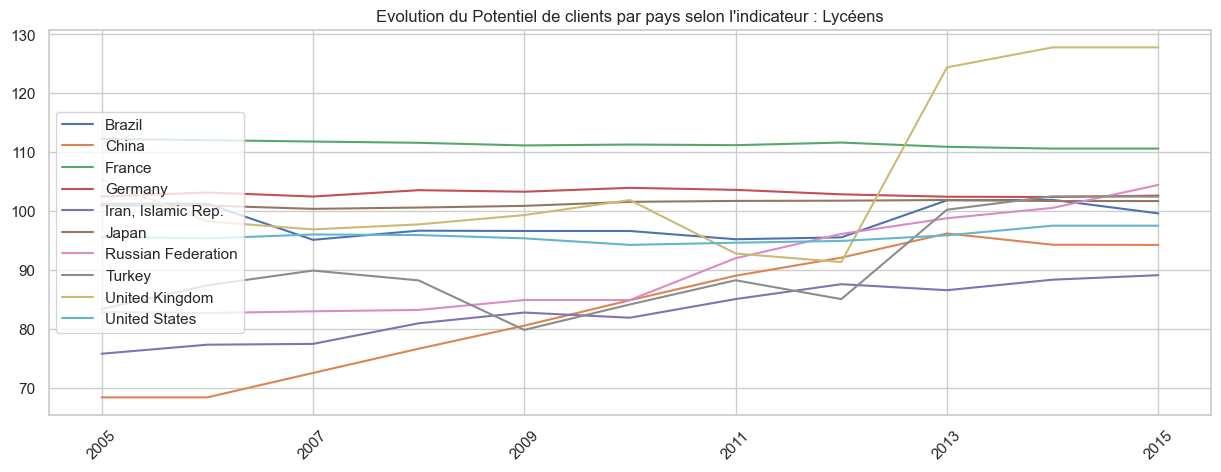

-------------------------------------------------------Etudiants---------------------------------------------------------------------------------------


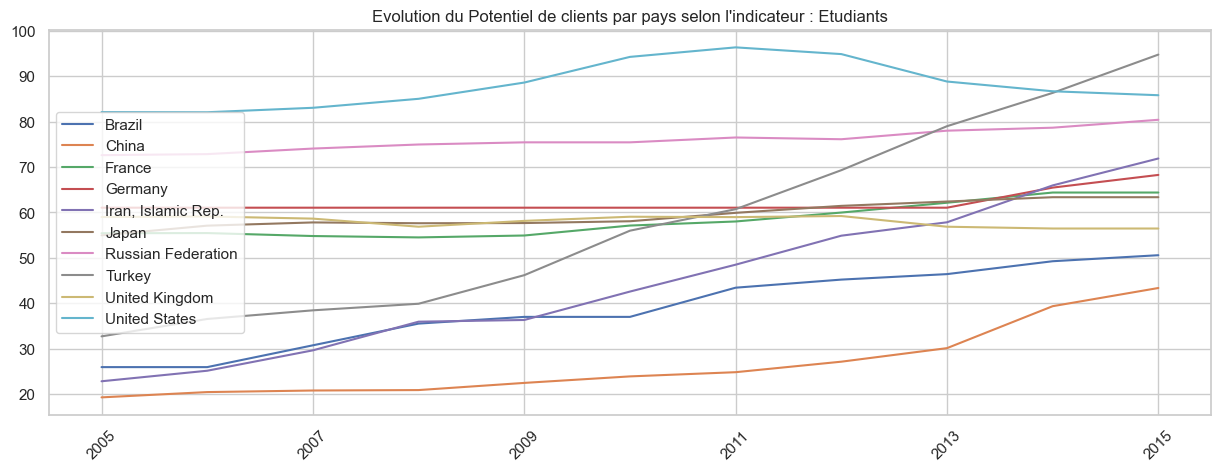

-------------------------------------------------------Population_15_24---------------------------------------------------------------------------------------


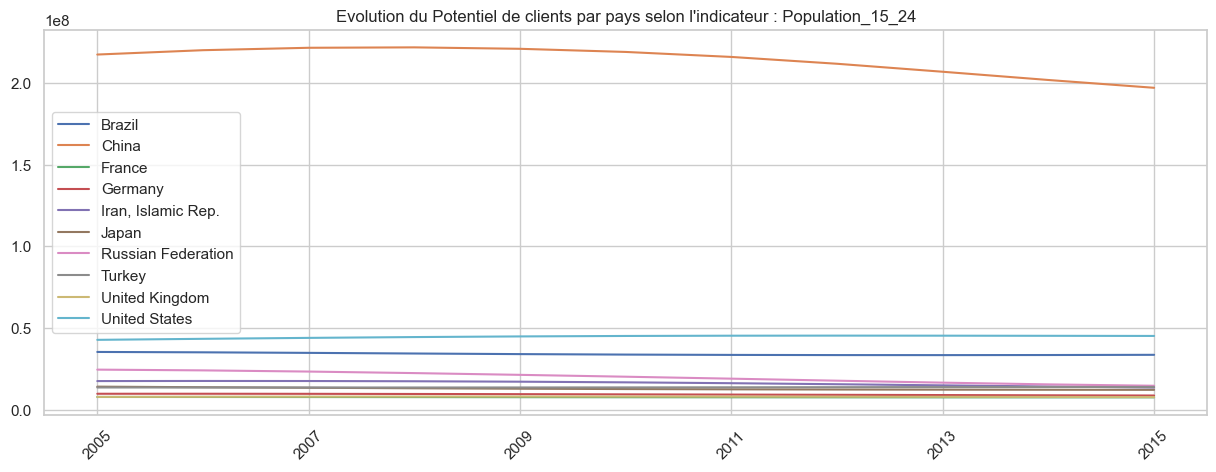

In [190]:
for ind in liste_nom_indicateurs_finale:
    print('-------------------------------------------------------' + ind + '---------------------------------------------------------------------------------------')
    fig = plt.figure(1, figsize=(15, 5))
    plt.title("Evolution du Potentiel de clients par pays selon l'indicateur : " + ind)
    df_temp = df_data2[df_data2['Country Name'].isin(meilleurs_clients) & (df_data2['Indicator Code']==liste_code_indicateurs_finale[liste_nom_indicateurs_finale.index(ind)])]
    del df_temp['Indicator Code']
    del df_temp['Country Code']
    del df_temp['Indicator Name']
    del df_temp['Taux_remplissage']
    del df_temp['Long definition']
    df_temp.set_index('Country Name',inplace = True)
    j=0
    for pays in df_temp.index.tolist():
        df_temp.iloc[j,:].plot()
        j=j+1
    plt.legend(df_temp.index.tolist(), loc = 'center left')
    plt.xticks(rotation=45)
    plt.show();